In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["figure.dpi"]=300

sns.set_style("darkgrid") #background

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("/content/Cars.csv")
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
df.describe()
# No missing values as count is 81
# +ve skewness is there in hp as mean>meadian(50%)
# in hp outliers are there as huge difference in 75% and max

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


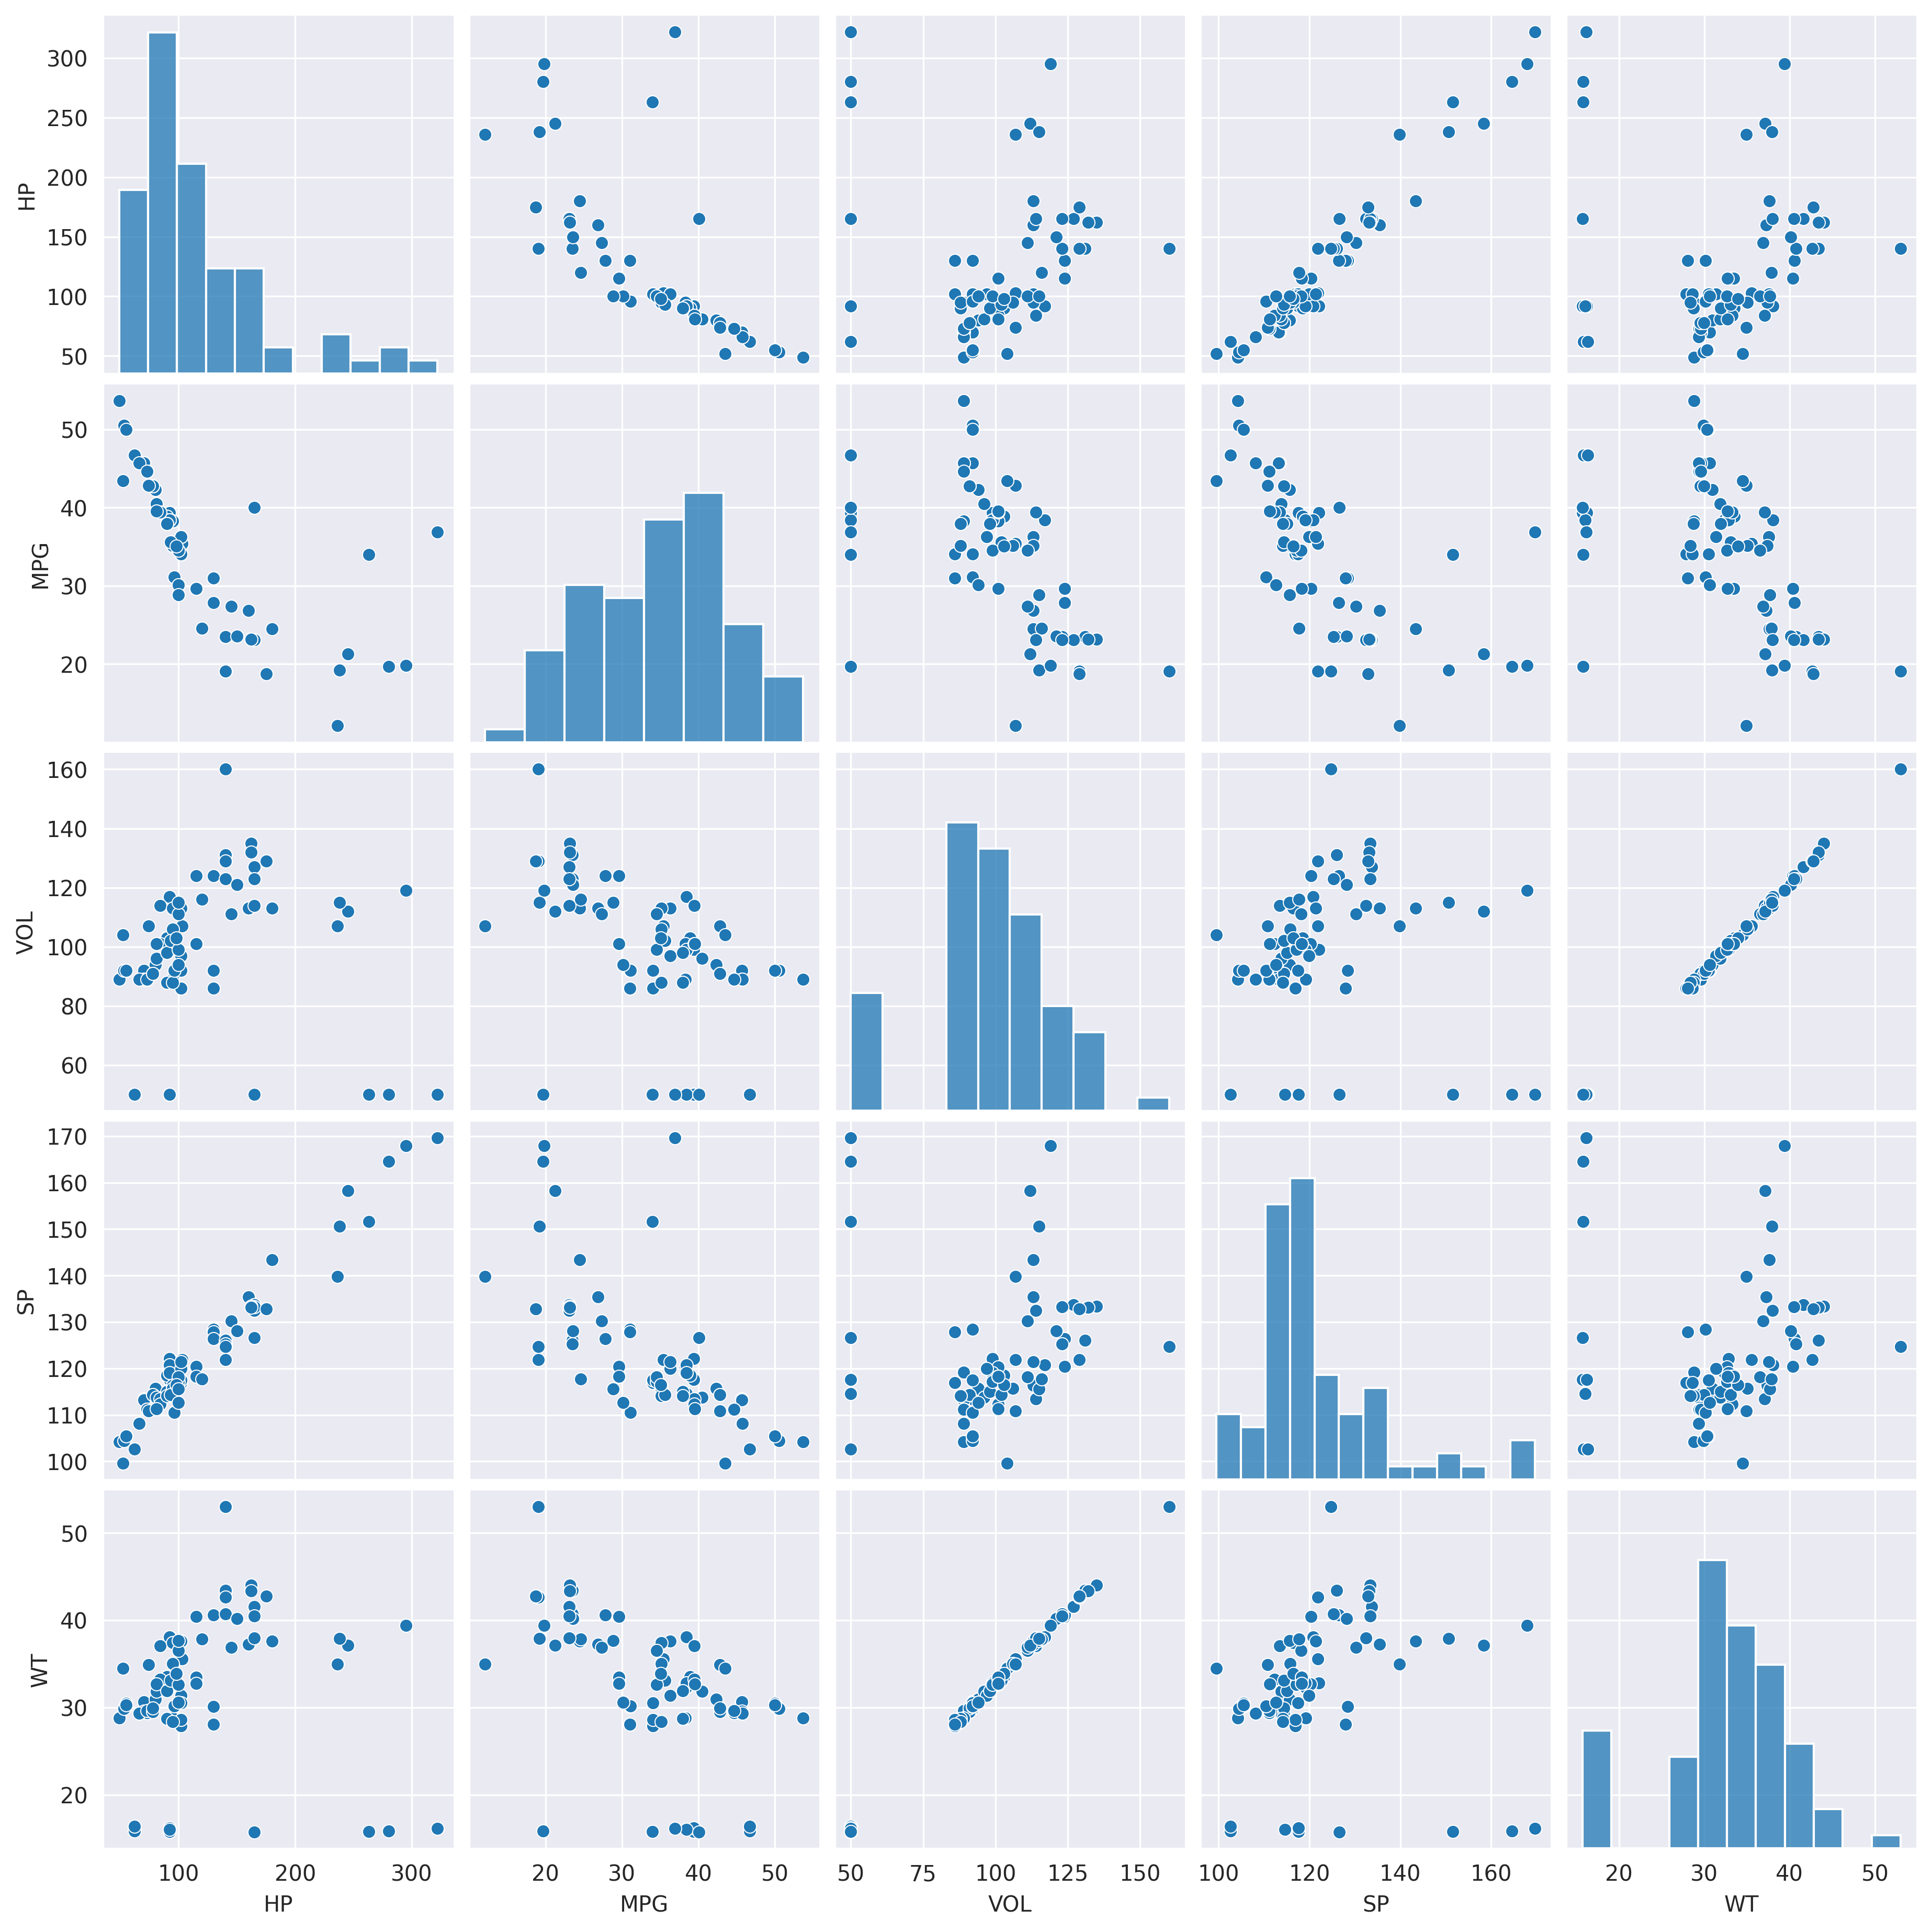

In [ ]:
sns.pairplot(df)
# direct relationship is in B/W WT and VOL

In [ ]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<Axes: >

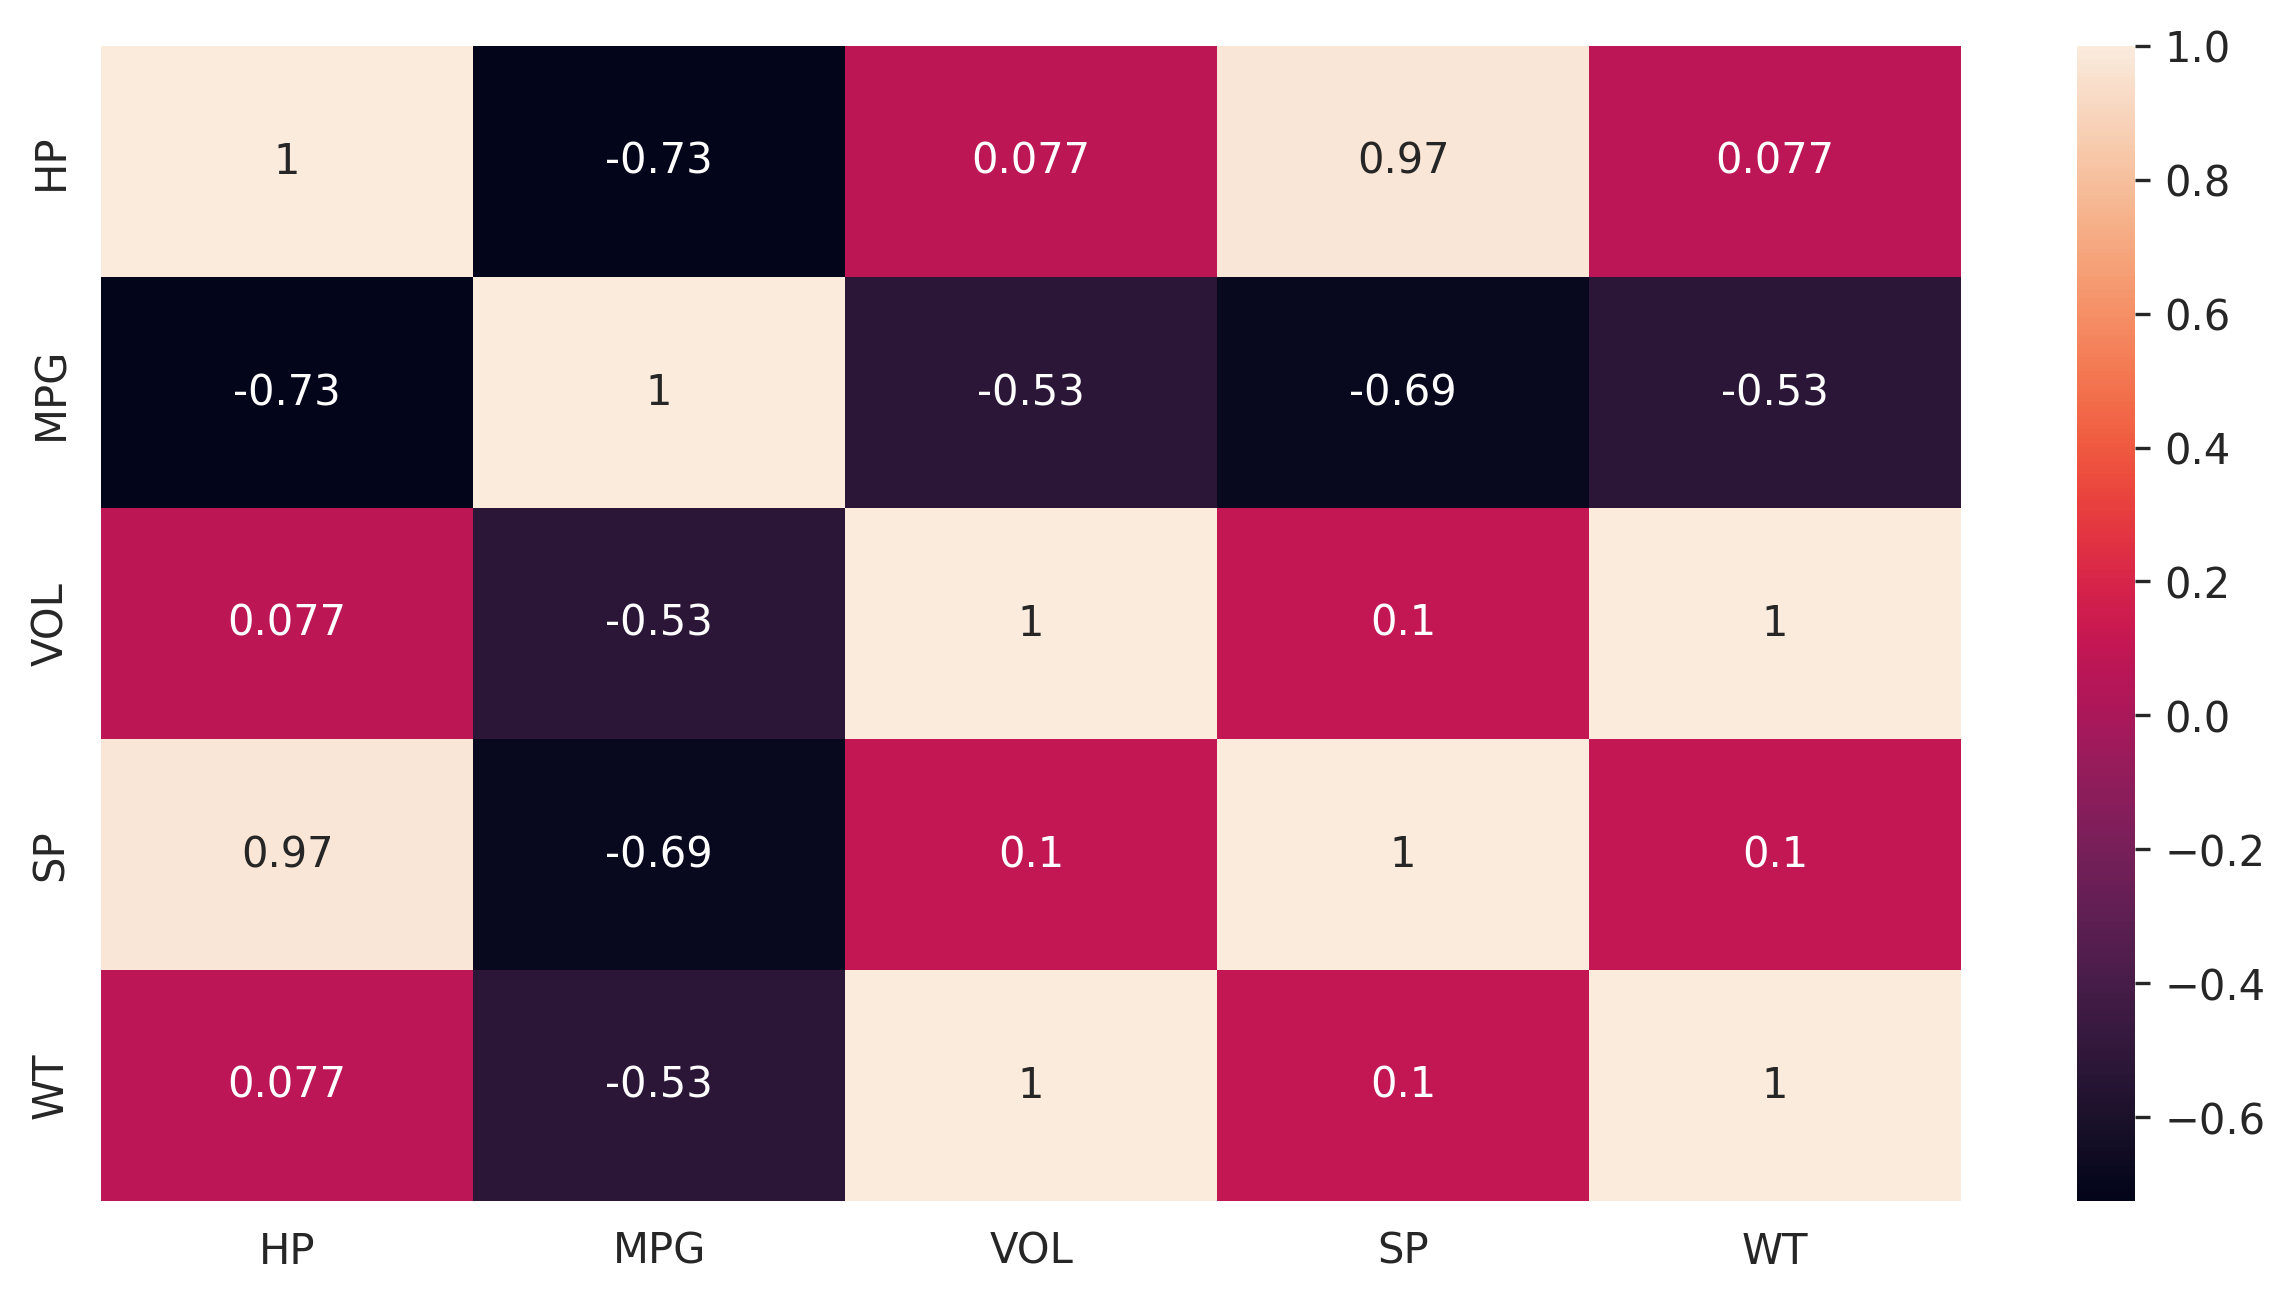

In [ ]:
#co0nfirm correlation with heatmap
sns.heatmap(df.corr(),annot=True)
# same perfect 1 relationship i.e, strong +ve relationship is present in WT and VOL

# **Model Building**

In [ ]:
model=smf.ols("MPG~HP+VOL+SP+WT",data=df).fit()

In [ ]:
model.pvalues
# WT and VOL p-values are grater than alpha so accept H0
# H0: slope=0 so columns are not imp,
# H1: slope!=0 so columns are important
# HP,SP are imp and WT,VOL are not important

,0
Intercept,0.042936
HP,0.000001
VOL,0.556294
SP,0.014579
WT,0.813649


# **Linear regression**

In [ ]:
# consider WT and excluded VOL
wt=smf.ols("MPG~WT+SP+HP",data=df).fit()
wt.pvalues
#all p-values are less than alpha so accept H1: acolumns are important

,0
Intercept,5.053995e-02
WT,1.914892e-13
SP,1.089096e-02
HP,7.560276e-07


In [ ]:
# consider COL and excluded WT
vol=smf.ols("MPG~VOL+SP+HP",data=df).fit()
vol.pvalues
#all p-values are less than alpha so accept H1: acolumns are important

,0
Intercept,4.194554e-02
VOL,1.648229e-13
SP,1.207855e-02
HP,8.644870e-07


In [ ]:
#conclusion WT and VOL arte imp but combinely they are creating multicollinearity problem

# **Calculate VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
data=df.drop(columns=["MPG"])
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [ ]:
#VIF = 1/1-rsquared for each variable
# for VIF of VOL consider VOL~HP+SP+WT, calculate rsquare andfind VIF of VOL
# # for VIF of HP consider HP~VOL+SP+WT, calculate rsquare andfind VIF of WT

In [ ]:
list1=[]
for i in range(1,11):
  list1.append(i*2)

In [ ]:
data

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [ ]:
data.values

array([[ 49.        ,  89.        , 104.1853528 ,  28.7620589 ],
       [ 55.        ,  92.        , 105.4612635 ,  30.46683298],
       [ 55.        ,  92.        , 105.4612635 ,  30.19359657],
       [ 70.        ,  92.        , 113.4612635 ,  30.63211391],
       [ 53.        ,  92.        , 104.4612635 ,  29.88914864],
       [ 70.        ,  89.        , 113.1853528 ,  29.59176832],
       [ 55.        ,  92.        , 105.4612635 ,  30.30847957],
       [ 62.        ,  50.        , 102.5985128 ,  15.84775807],
       [ 62.        ,  50.        , 102.5985128 ,  16.35948352],
       [ 80.        ,  94.        , 115.6452041 ,  30.92015417],
       [ 73.        ,  89.        , 111.1853528 ,  29.36334142],
       [ 92.        ,  50.        , 117.5985128 ,  15.75353468],
       [ 92.        ,  99.        , 122.1050553 ,  32.81359241],
       [ 73.        ,  89.        , 111.1853528 ,  29.3784363 ],
       [ 66.        ,  89.        , 108.1853528 ,  29.34727902],
       [ 73.        ,  89

In [ ]:
vif=pd.DataFrame()
vif

""


In [ ]:
vif["features"]=data.columns
vif

,features
0,HP
1,VOL
2,SP
3,WT


In [ ]:
range(len(data.columns)) #4 columns 0 to 3

range(0, 4)

In [ ]:
[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]

[11.19129601632287, 12708.789368875166, 50.54196822792541, 12172.827328054147]

In [ ]:
vif["VIF"]=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
# in range i will iterate through every column one by one

In [ ]:
vif
# check highest VIF values :VOL
# closest VIF value to highest is WT
#very High vif values so they are creating multicollinearity problem

,features,VIF
0,HP,11.191296
1,VOL,12708.789369
2,SP,50.541968
3,WT,12172.827328


# **Subset Selection**

AIC value

In [ ]:
# consider WT and excluded VOL
wt=smf.ols("MPG~WT+SP+HP",data=df).fit()
wt.rsquared,wt.aic

(0.7694828139983458, 476.29927501529767)

In [ ]:
# consider COL and excluded WT
vol=smf.ols("MPG~VOL+SP+HP",data=df).fit()
vol.rsquared,vol.aic

(0.770368341321302, 475.9875158854609)

# **Model validation technoques **


*   Residuals error= actual- predicted values.no pattren should be there
*   Error vs x variable
*   Error vs predicted
*   Q-Q plot to check whether data is following normal distrubution or not





# **1. Residual analysis**


In [ ]:
# As per the subset selection. it is clear that VOL is more imp. than WT asw its Rsquare is more
# and AIC less. So we will select VOL and drop WT column.

#NORMALITY TEST

In [ ]:
# Create final model

model=smf.ols("MPG~HP+VOL+SP",data=df).fit()
model.rsquared  #not a good xccuracy only 77%

0.770368341321302

In [ ]:
import statsmodels.api as sm #for Q-Q plot function for error vs predicted

In [ ]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
model.fittedvalues # predicted values
# for MPG check 1st record: its 53.70 in above output
# In below predicted values for 1st record predicted value is 43.59
# So error is 53-43=10

,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544
...,...
76,21.233143
77,17.867725
78,26.216856
79,12.237554


In [ ]:
model.params
# 43 is predicted using equation : y=m1X1+m2x2+m3X3+c
# y0=(-0.20)*49(HP)+(-0.20)*89(VOL)+0.40*104(SP)+29.92(intercept)
#so y0=43.59

,0
Intercept,29.923389
HP,-0.206705
VOL,-0.201651
SP,0.400659


In [ ]:
model.resid #error = actual-predicted value

,0
0,10.109912
1,7.756607
2,7.756607
3,3.334825
4,8.234688
...,...
76,15.666857
77,1.330162
78,7.783144
79,7.596179


Text(0, 0.5, 'Errors')

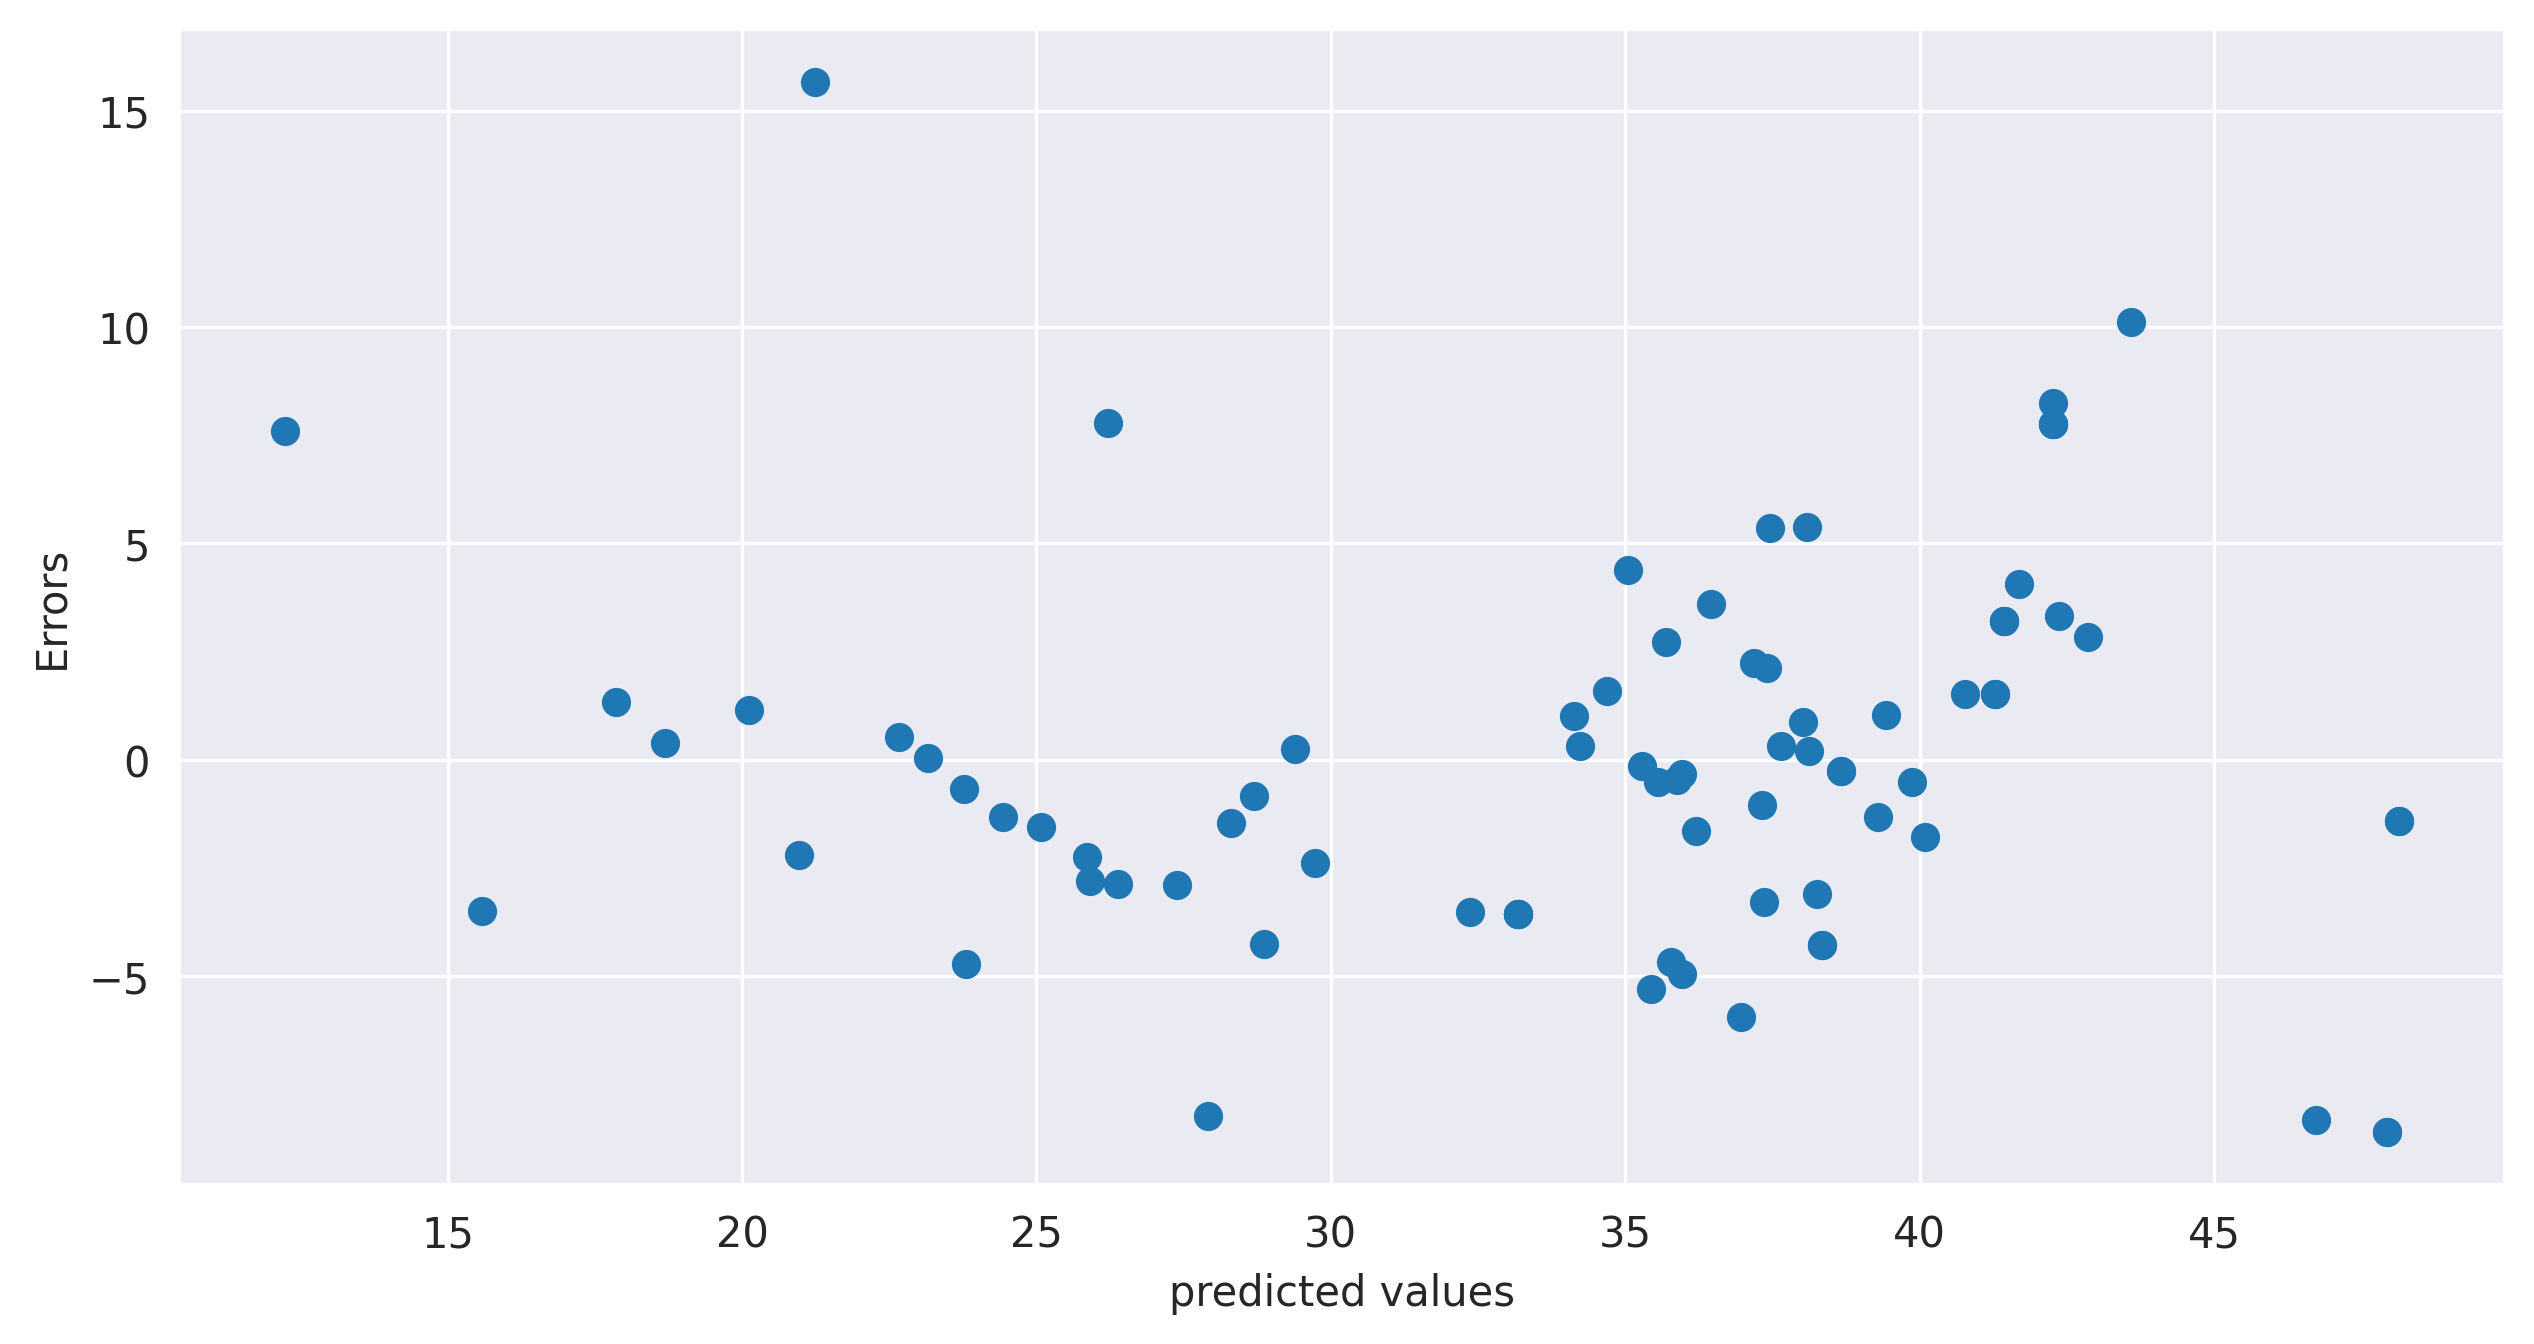

In [ ]:
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel("predicted values")
plt.ylabel("Errors")
#pattren is there

# **3. Residual vs Regressor (x)**

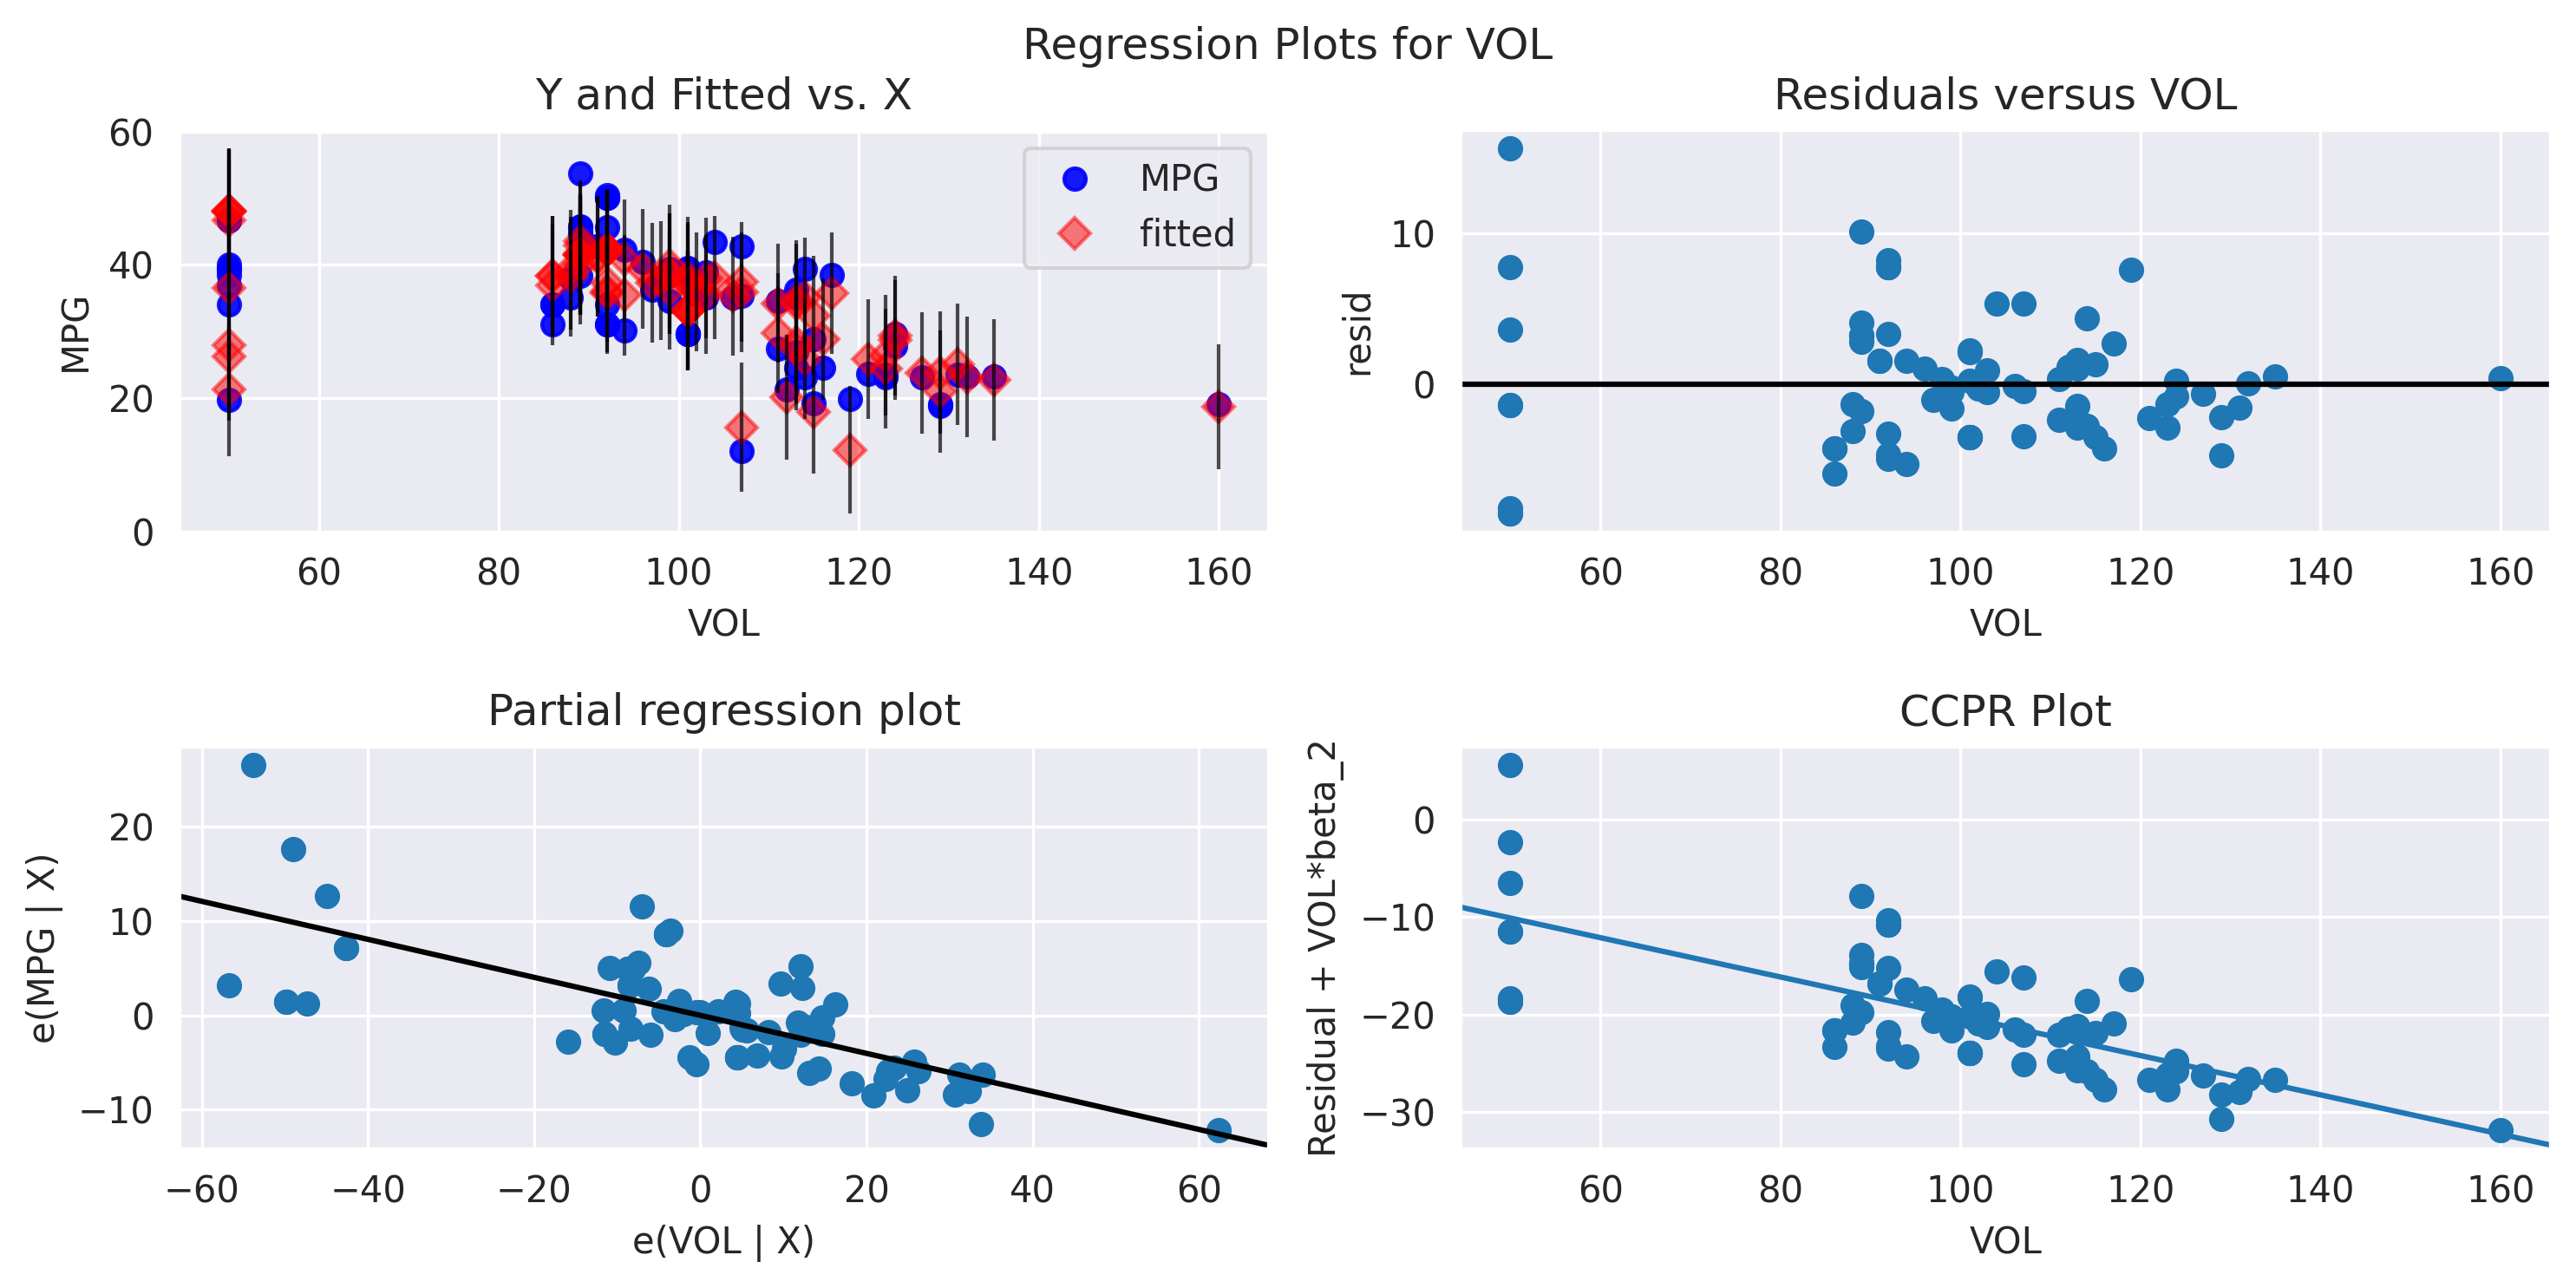

In [37]:
#VOL
sm.graphics.plot_regress_exog(model,"VOL");

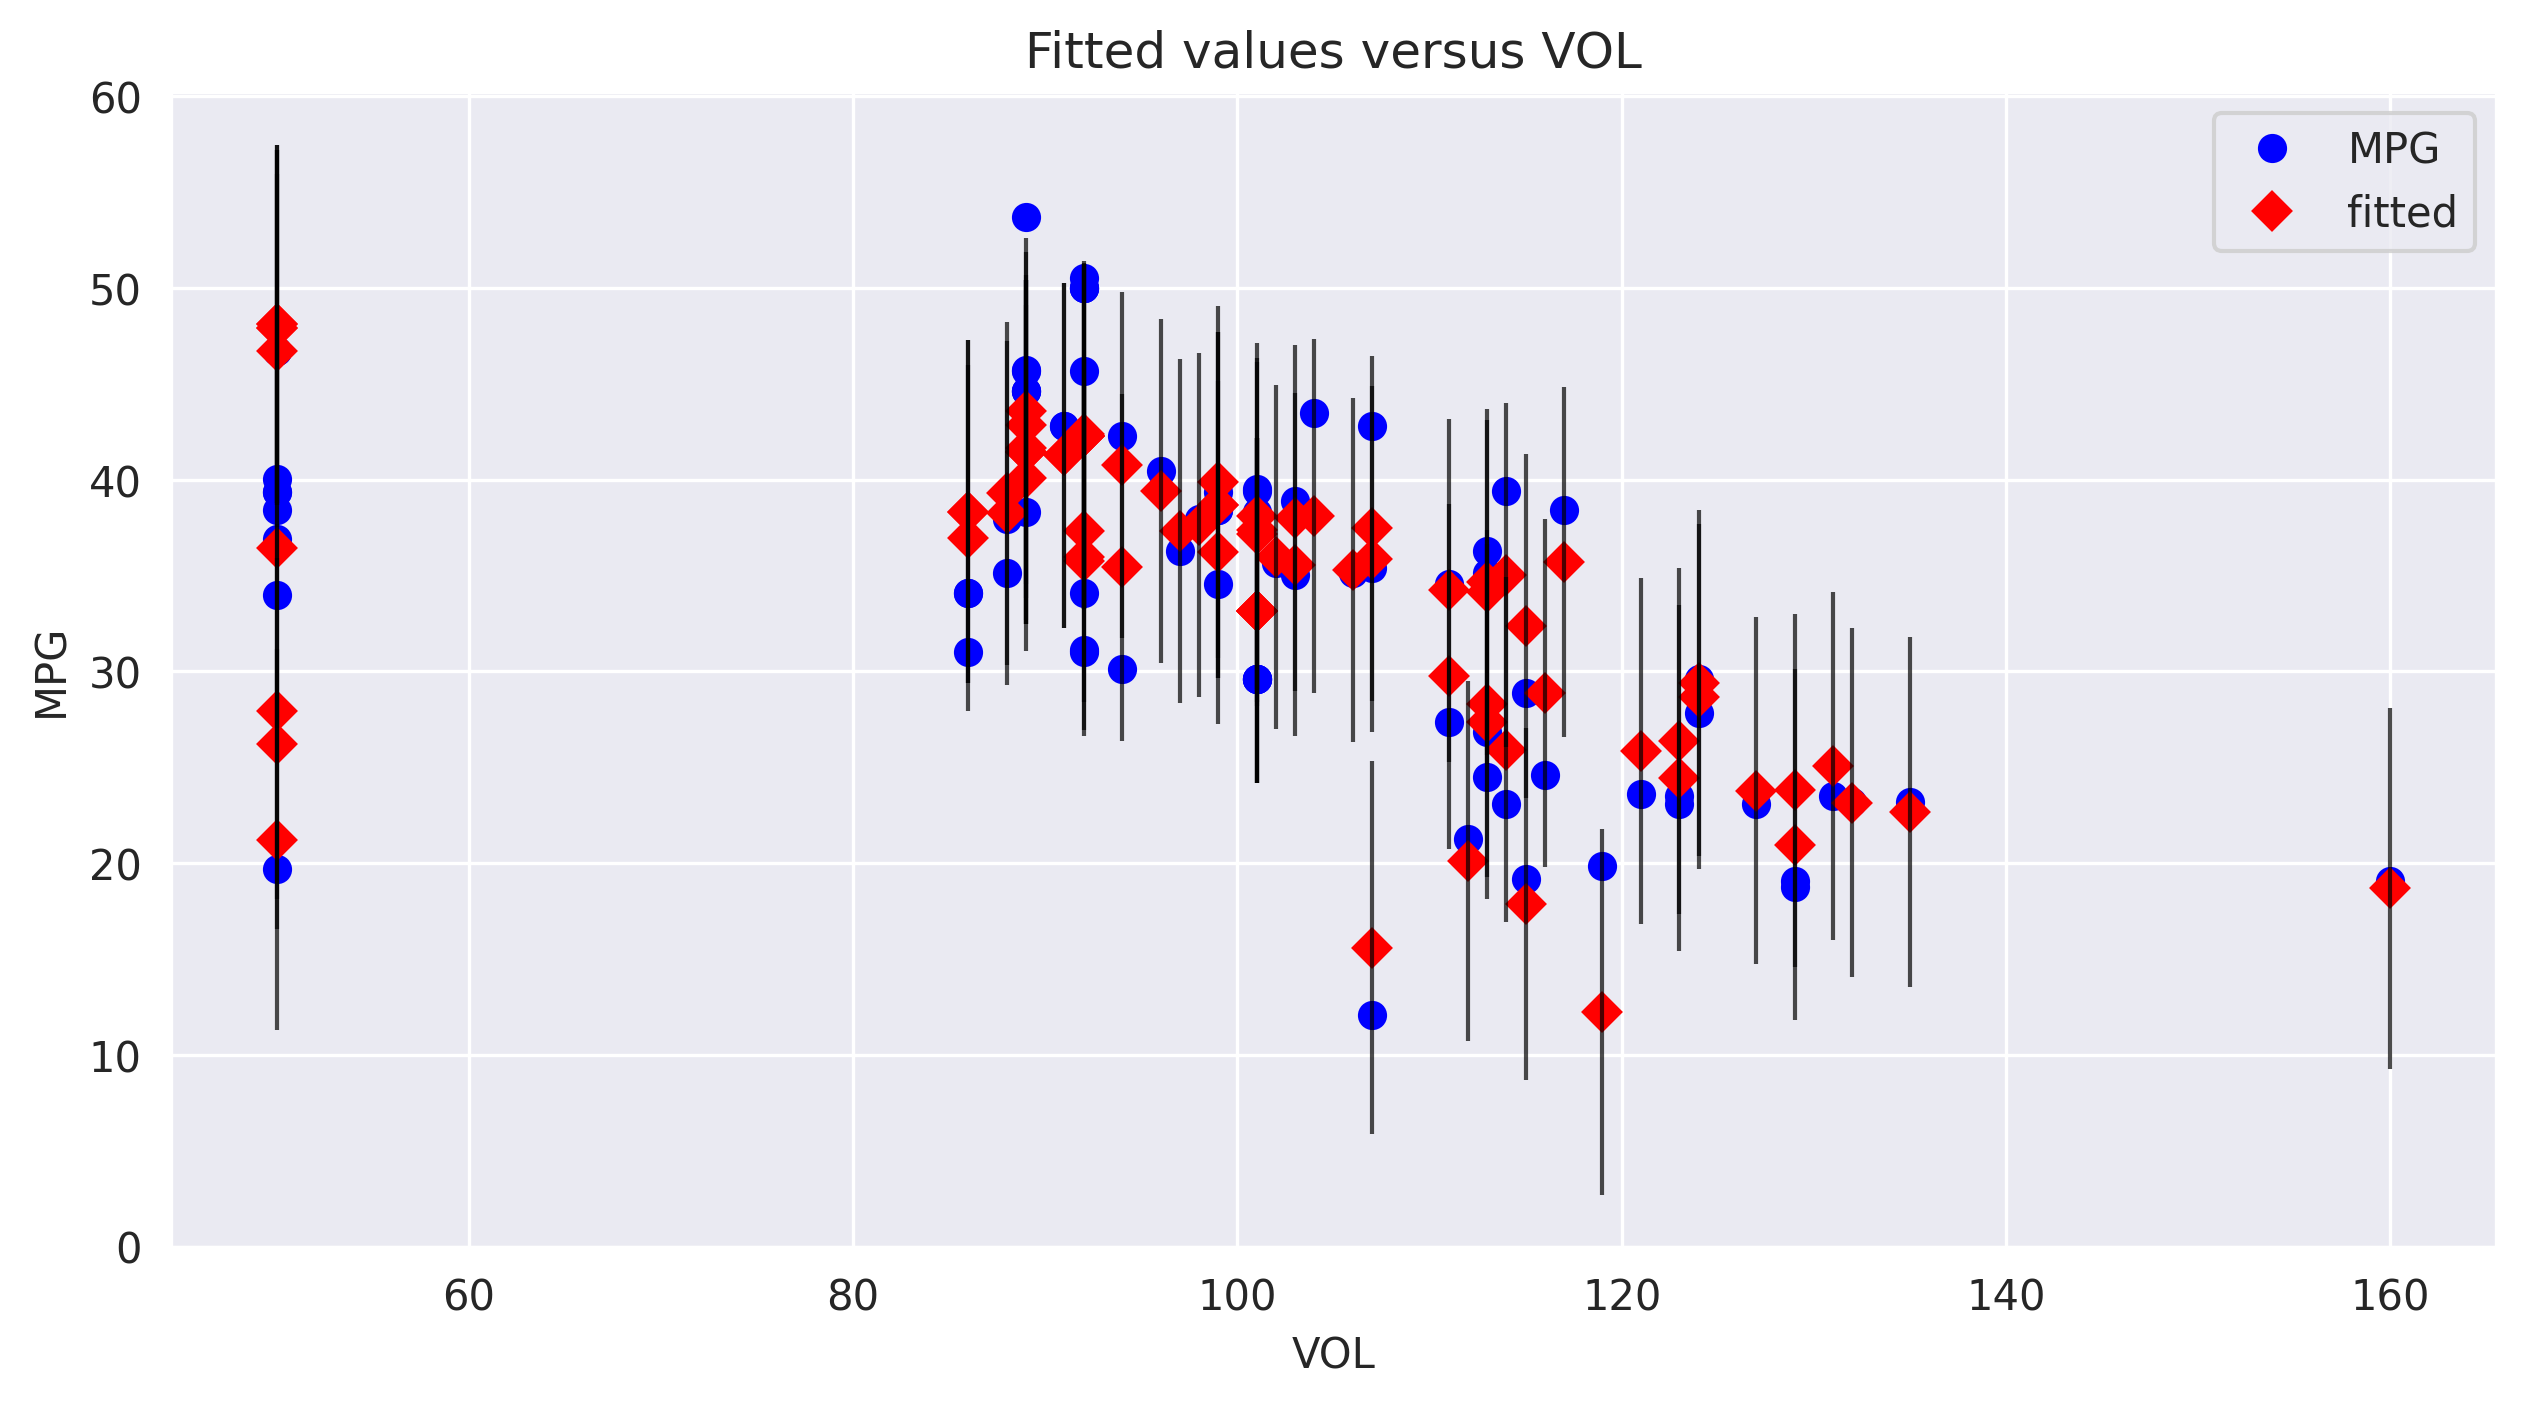

In [38]:
# to plot only 1st graph
sm.graphics.plot_fit(model,"VOL");
# blue:actual values, Red: predicted values

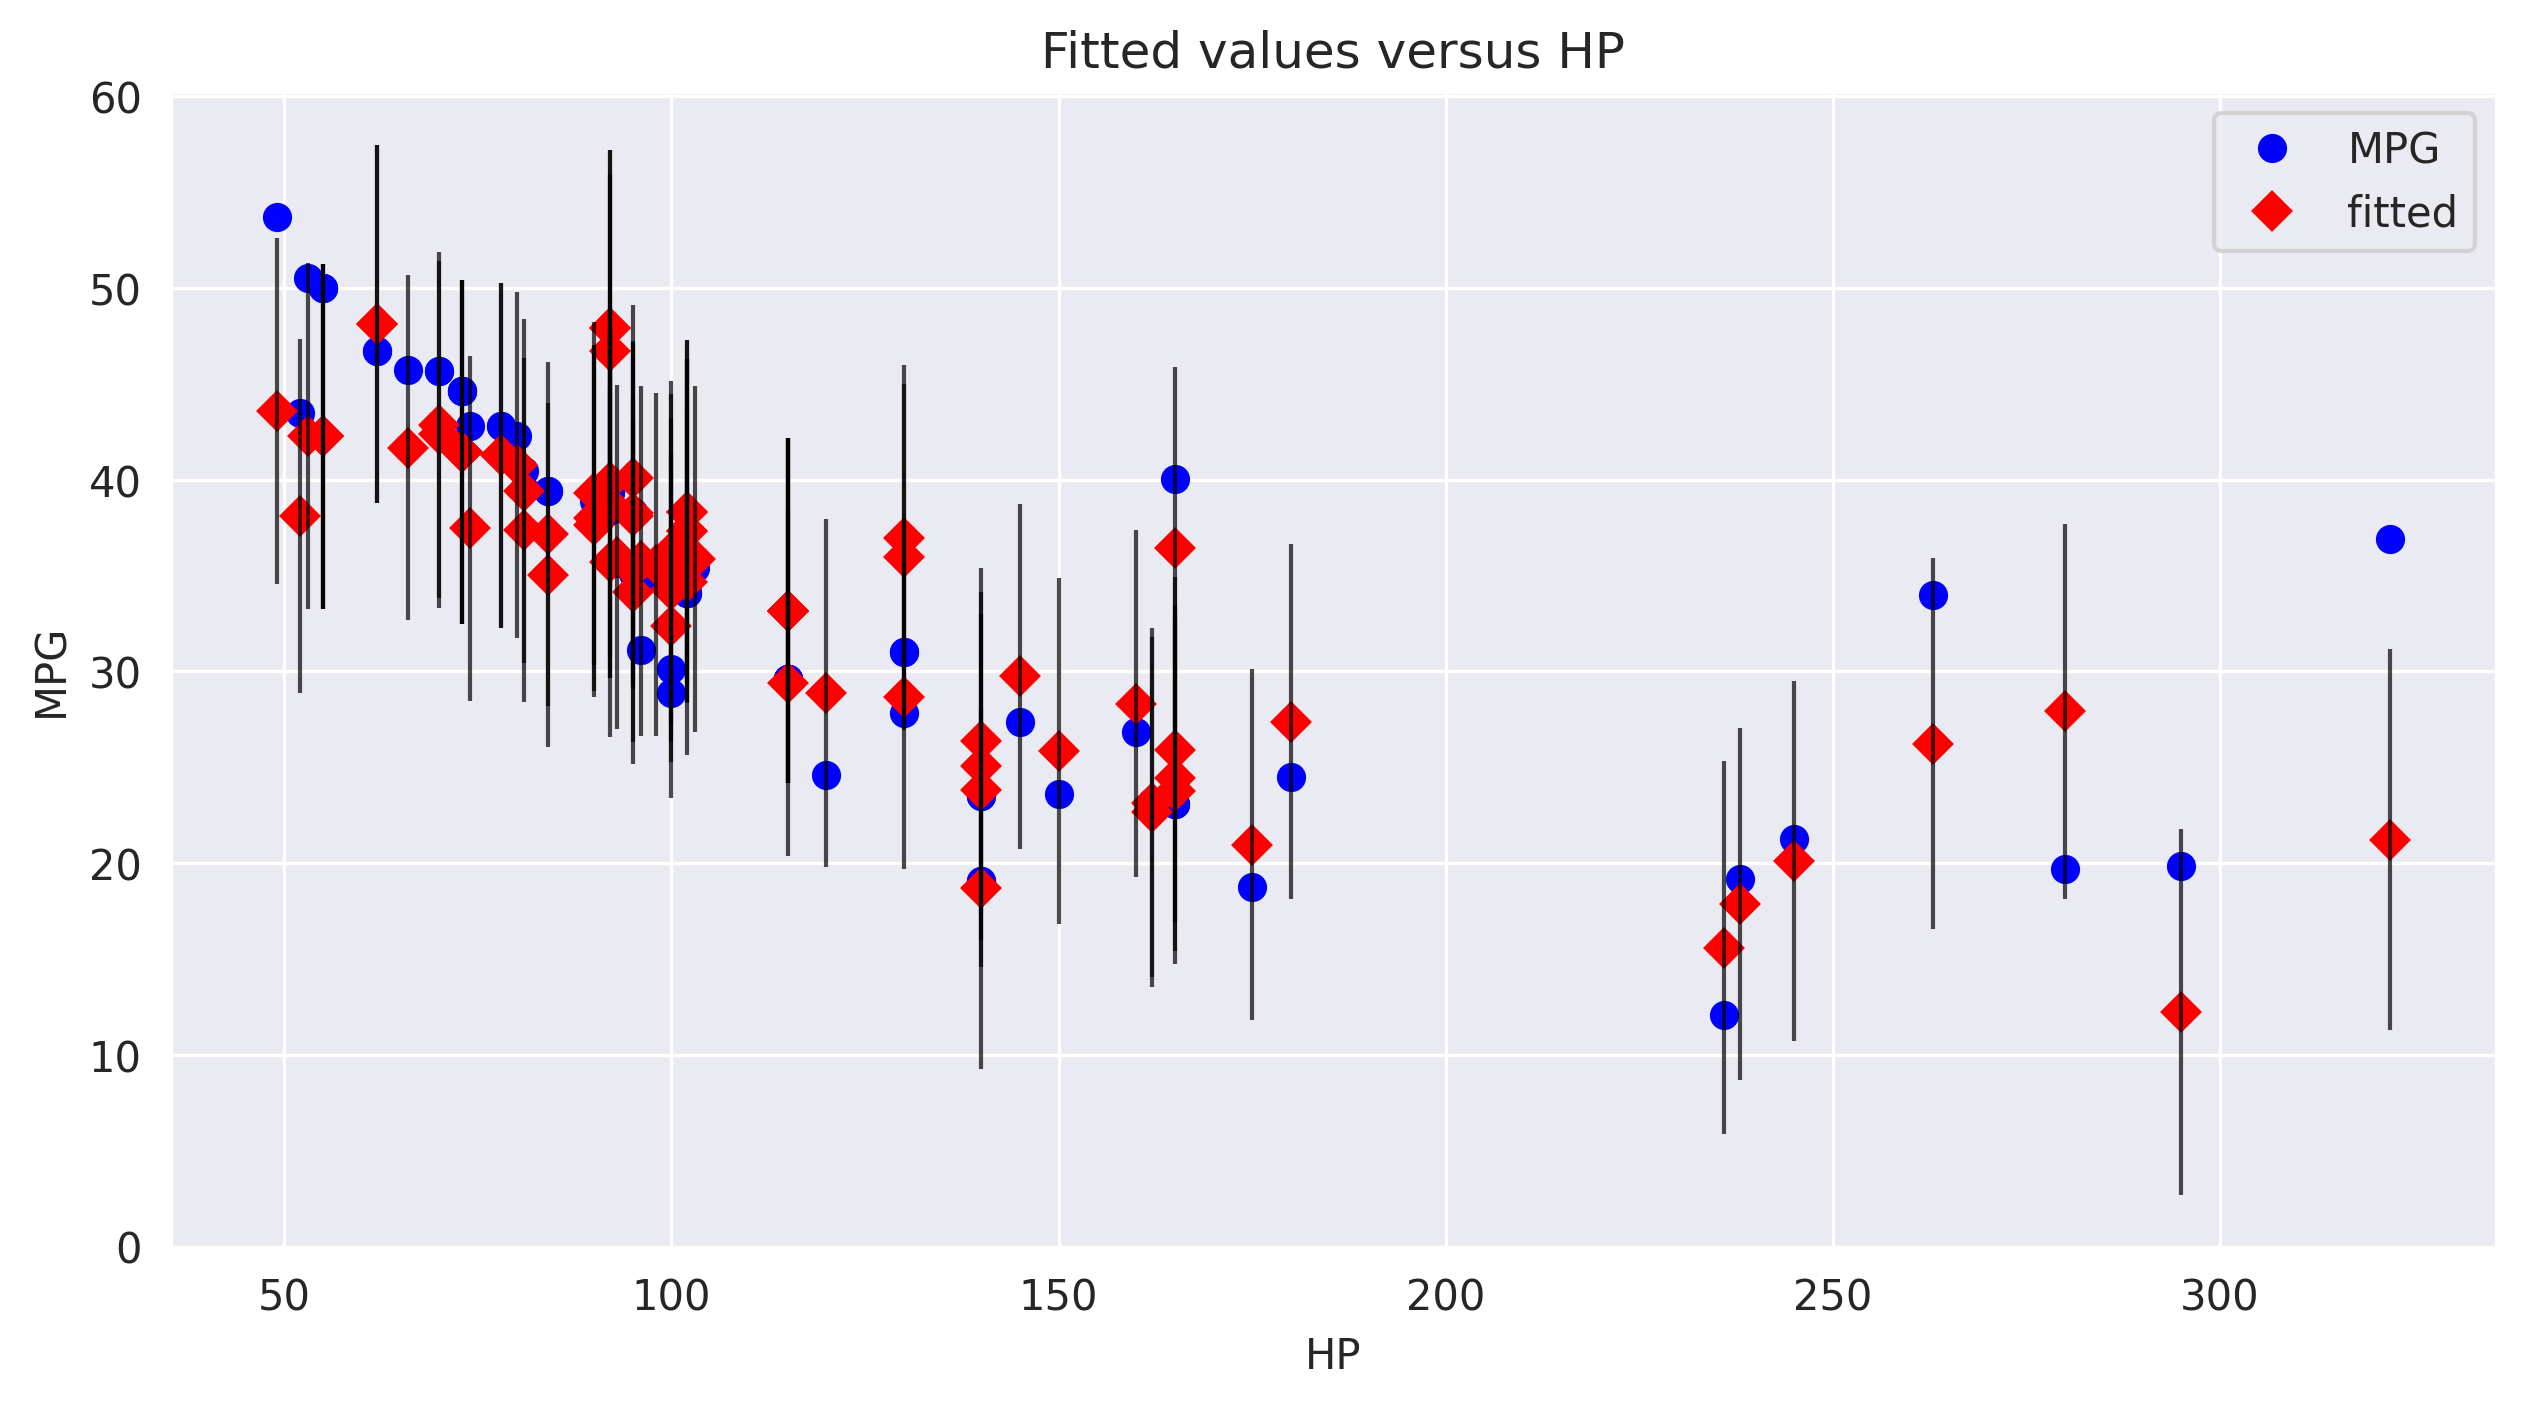

In [41]:
#HP
sm.graphics.plot_fit(model,"HP");

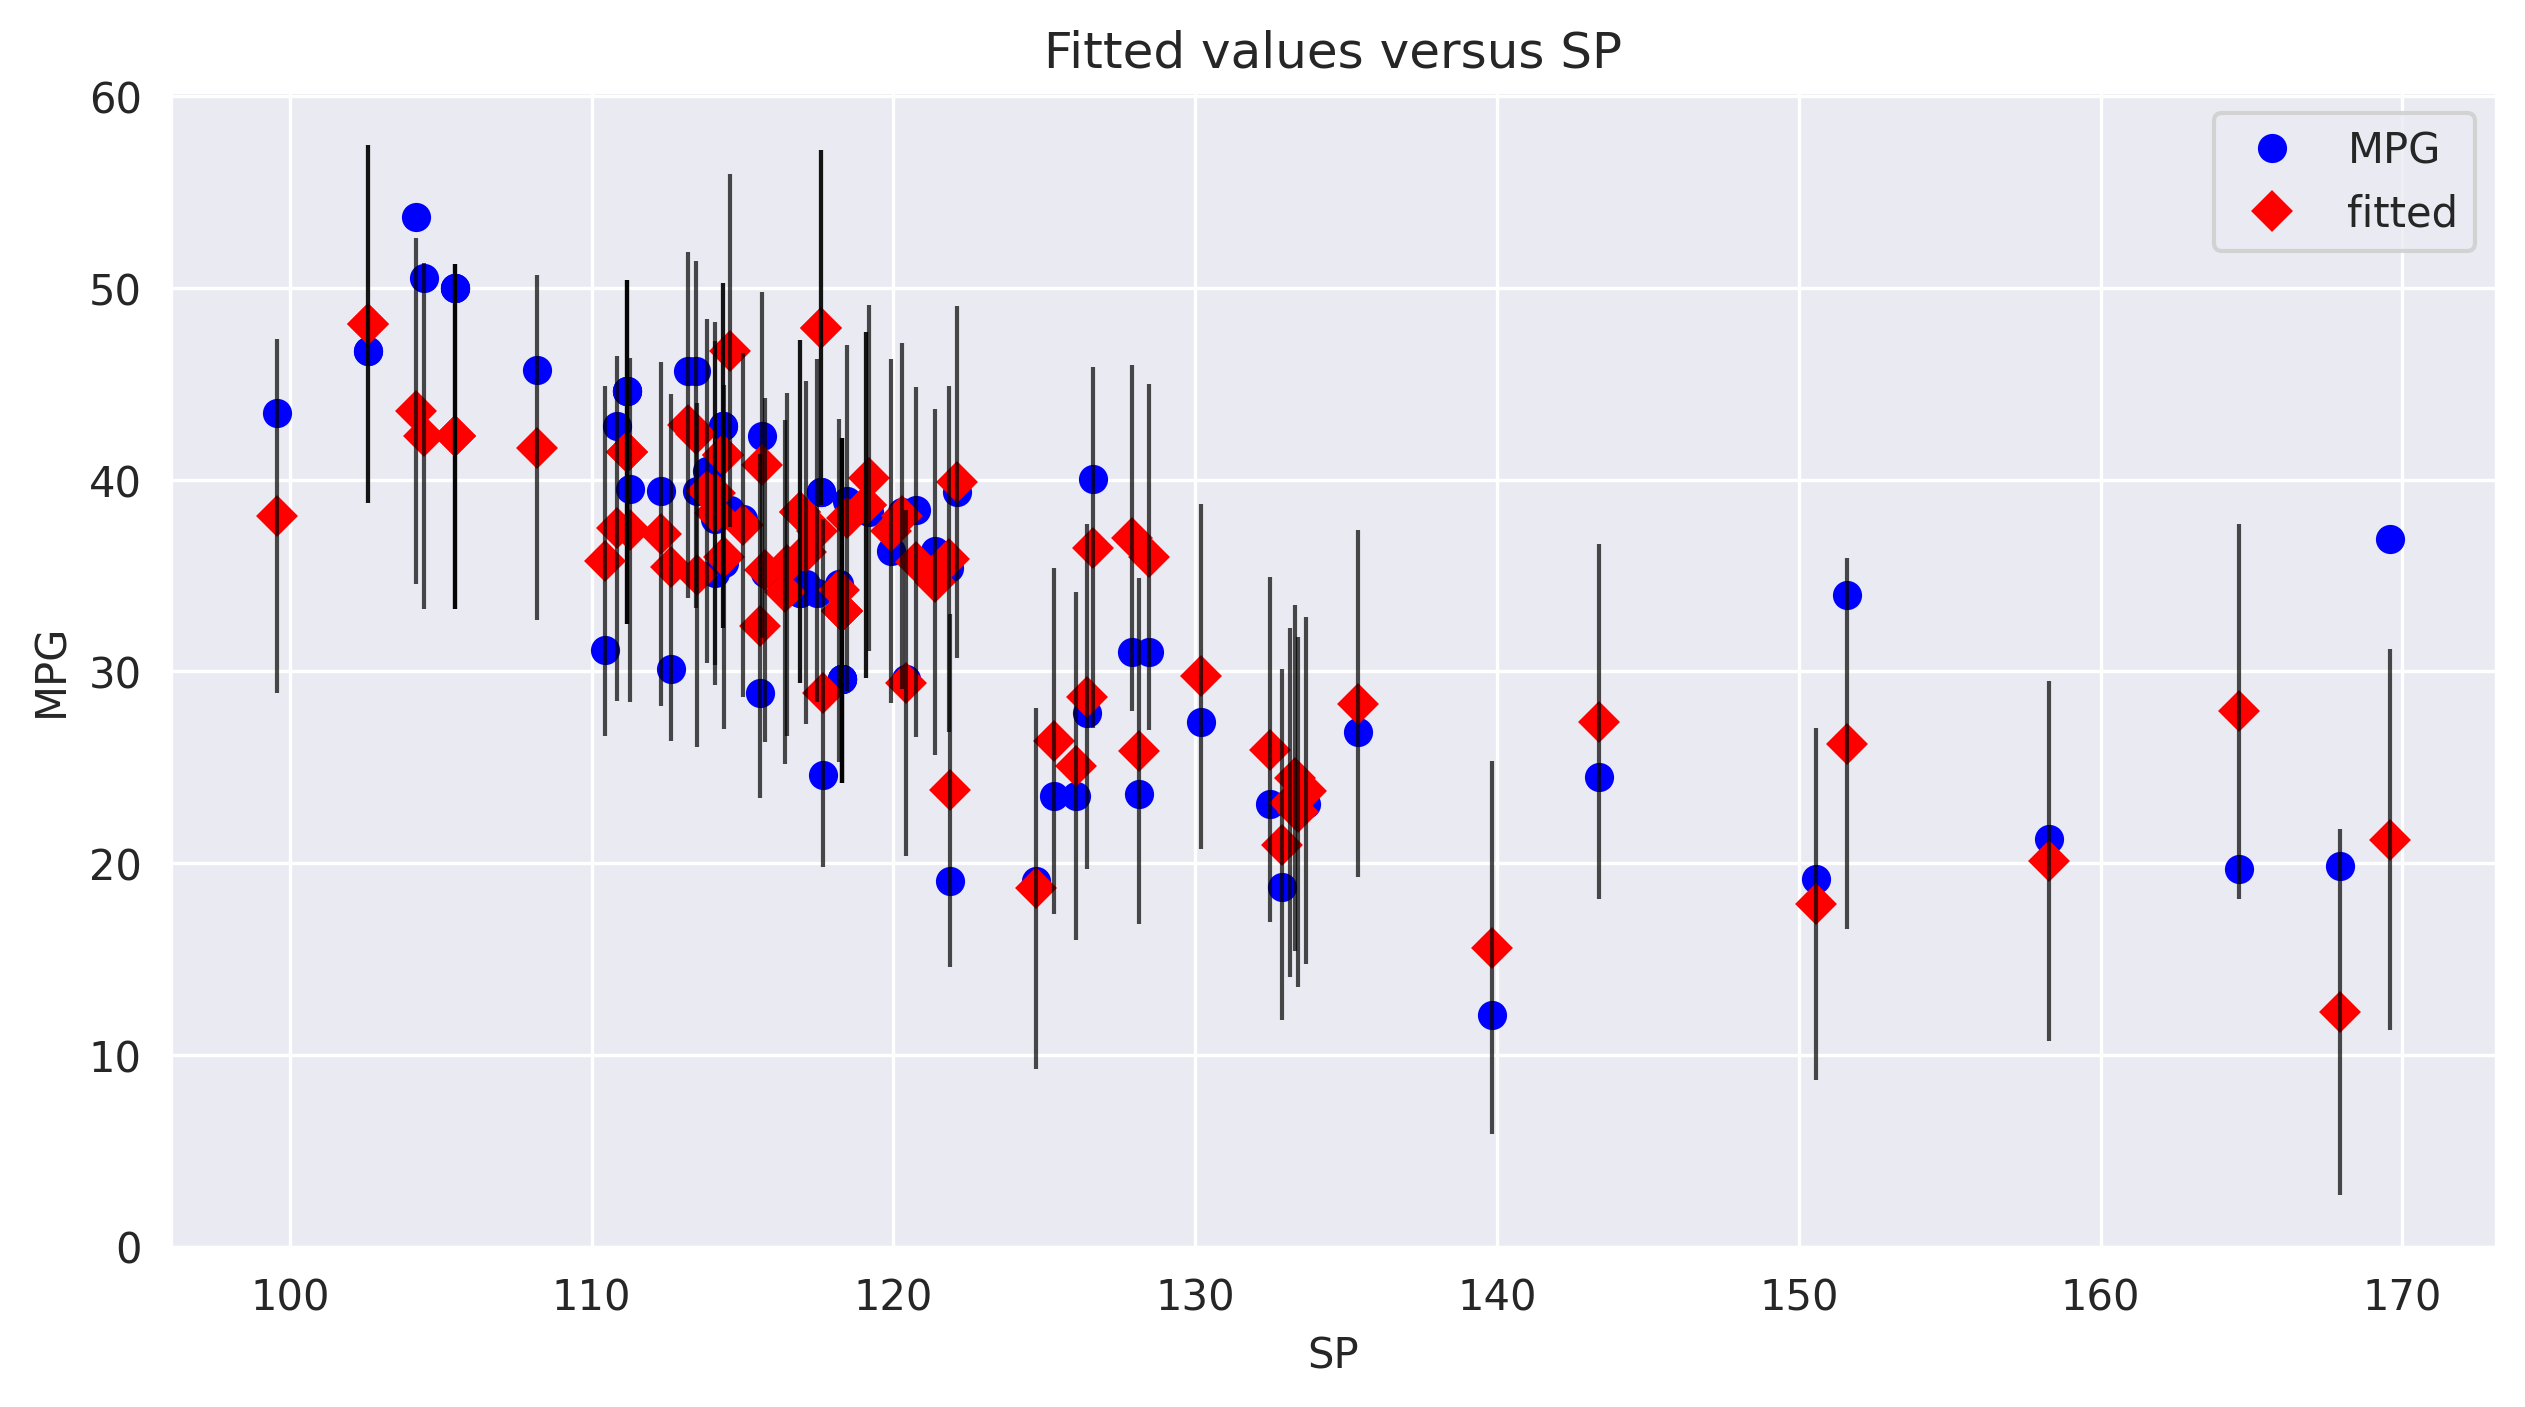

In [42]:
#SP
sm.graphics.plot_fit(model,"SP");

# **MODEL DELETION TECHNIQUES**

detecting influencers and outliers

In [39]:
model

In [40]:
# find the influence data
inf = model.get_influence()
# in statsmodels get_influence() will do the calculations


In [47]:
#calculate the cook's distence
c,p = inf.cooks_distance

#returns 81 cook's distences and 81 p values. only consider cook's distence

In [48]:
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

Text(0, 0.5, 'Cooks Distence')

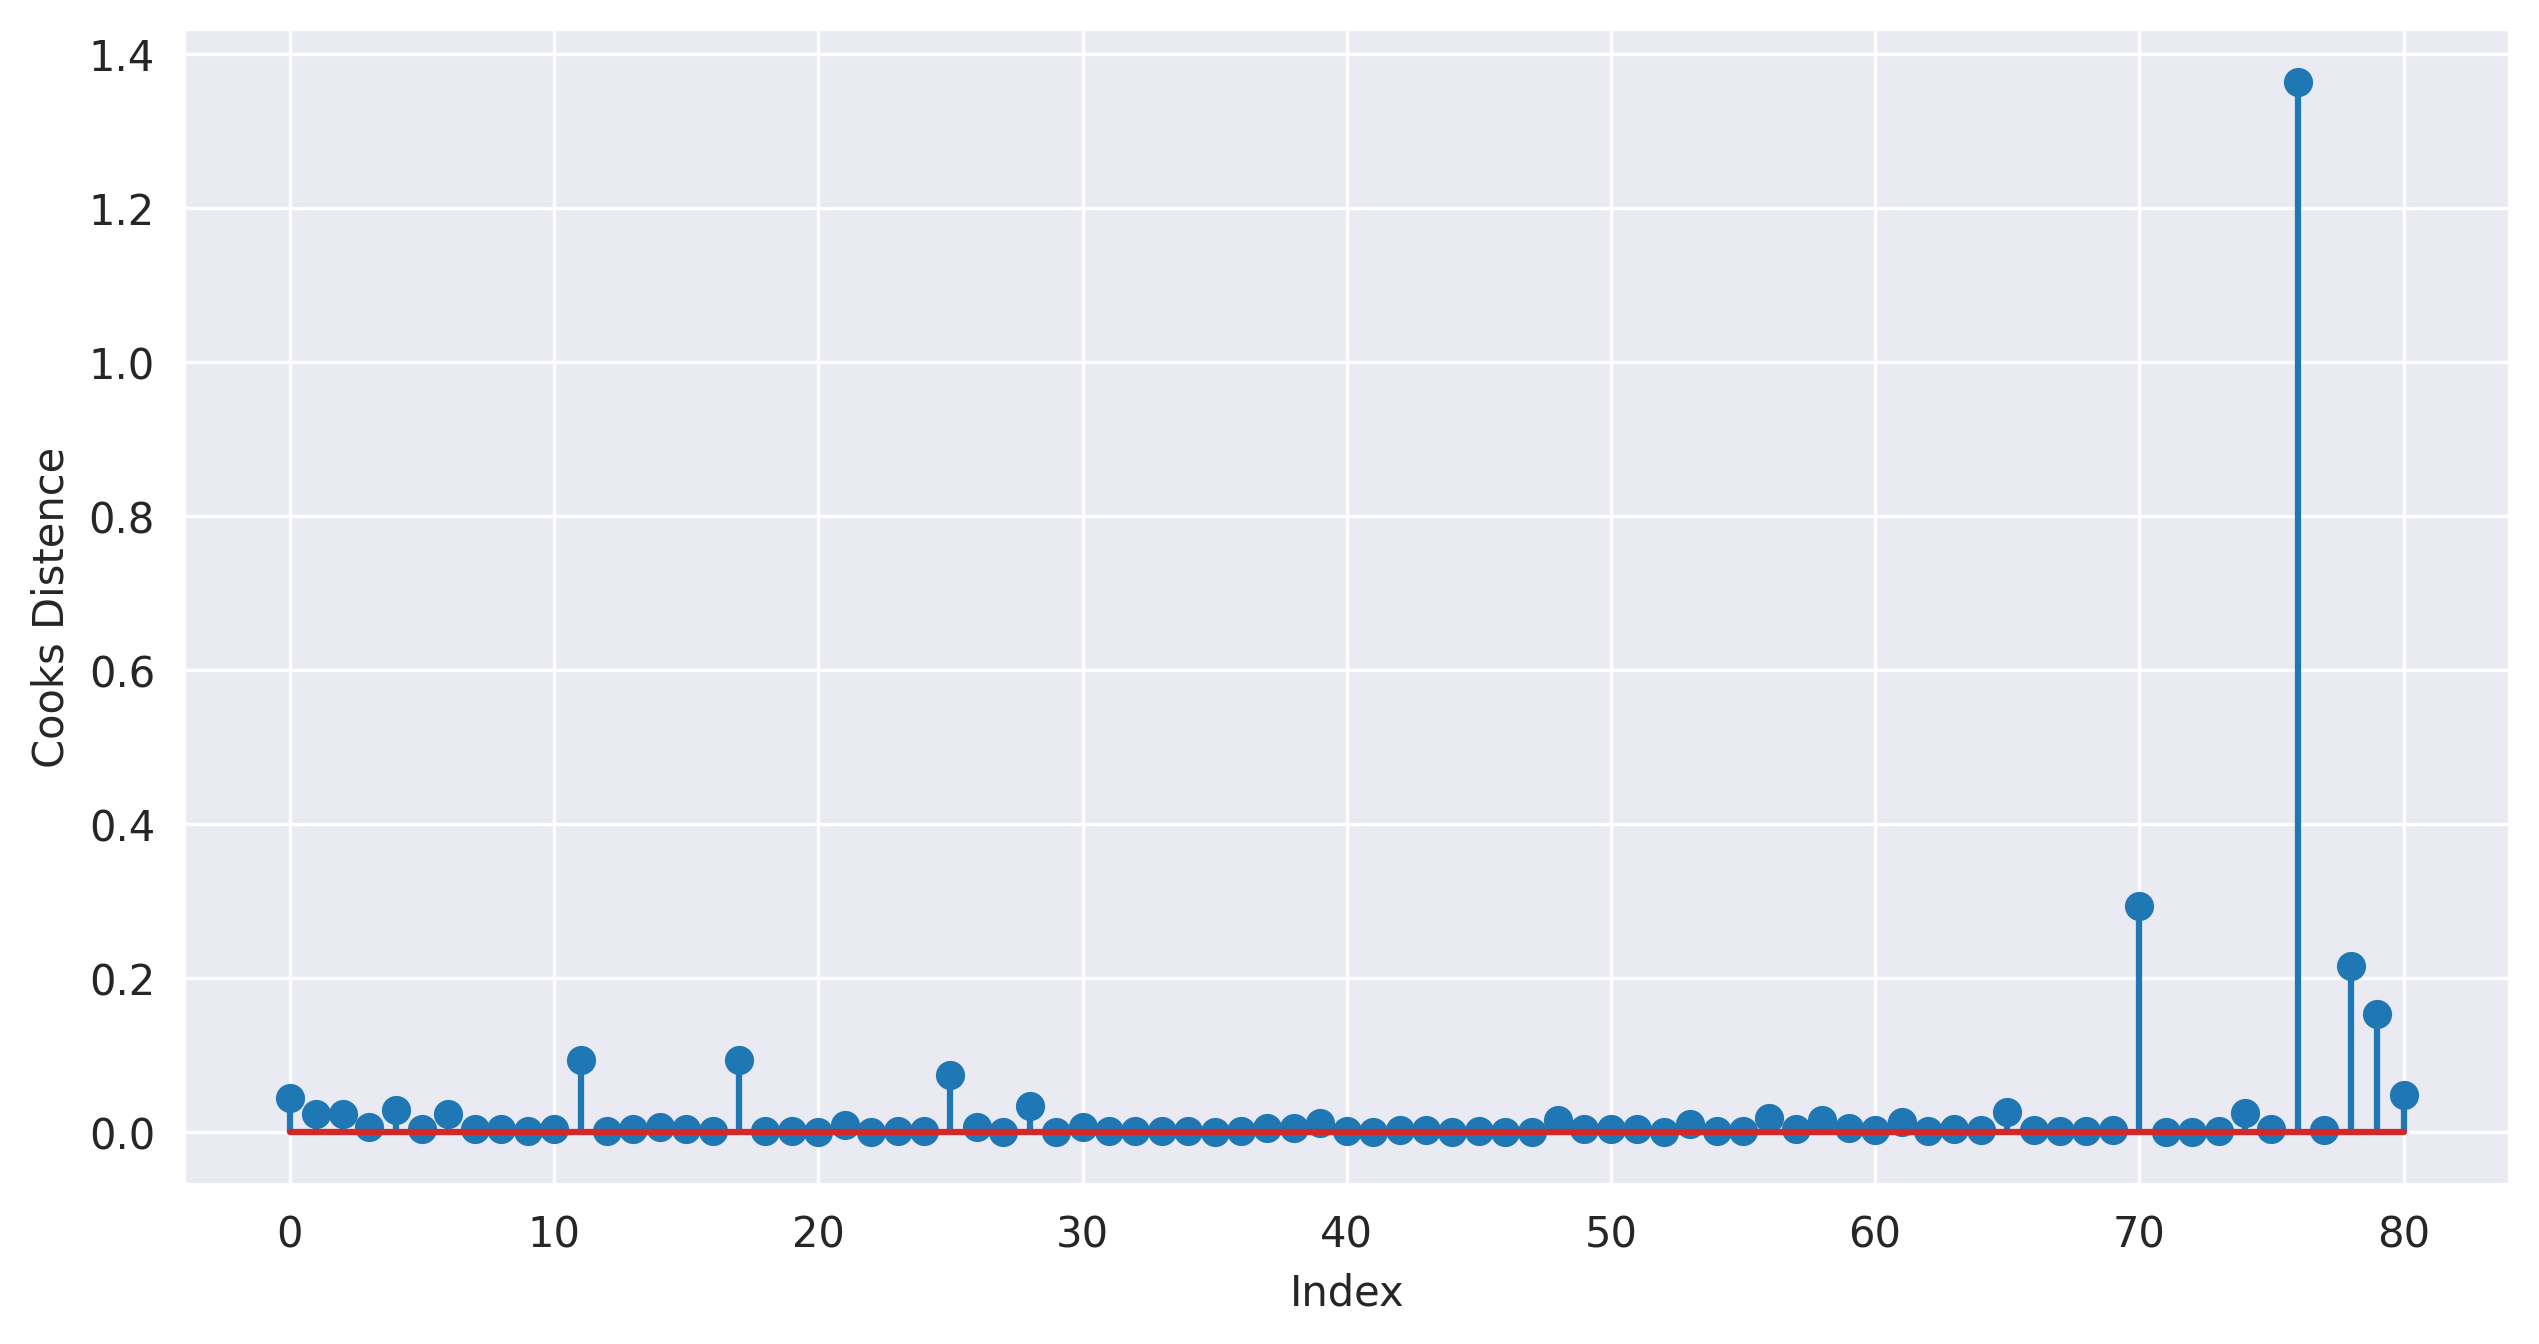

In [49]:
# cook's distence plot
plt.stem(c)
plt.xlabel("Index")
plt.ylabel("Cooks Distence")

In [50]:
np.argmax(c),np.max(c) # row 76 is influencer so drop it

(76, 1.3641743869103353)

In [51]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [52]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


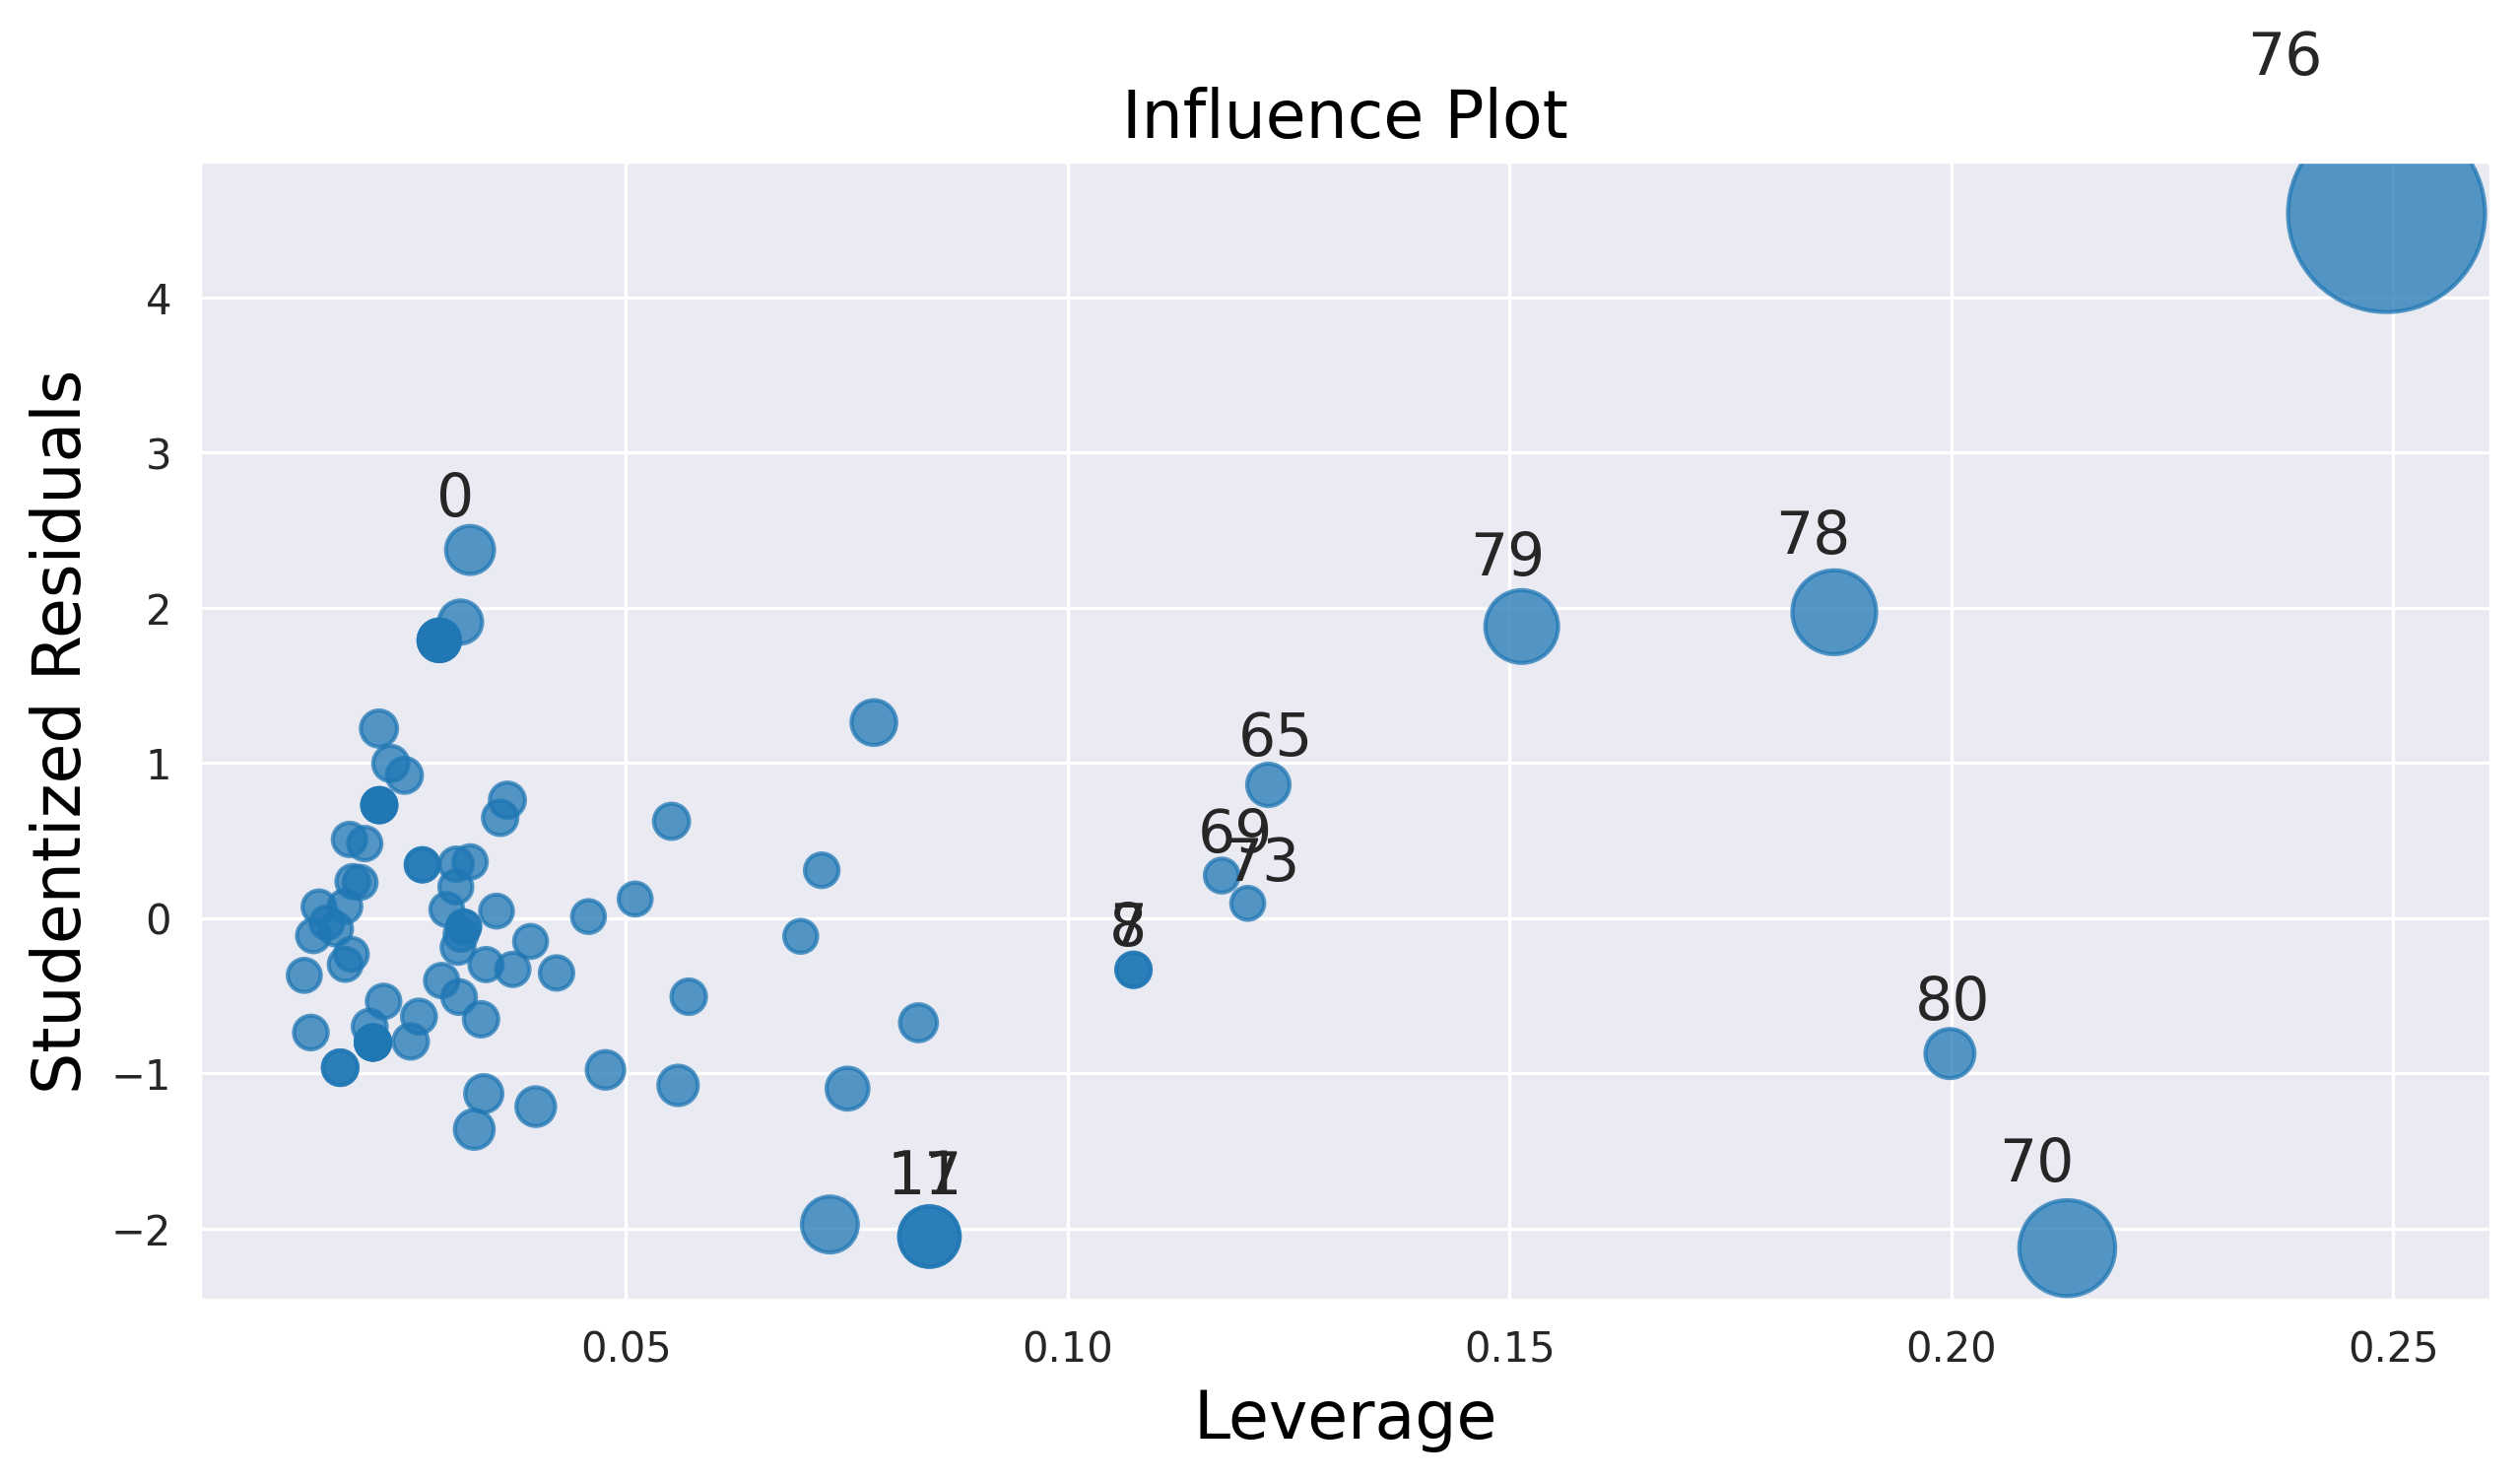

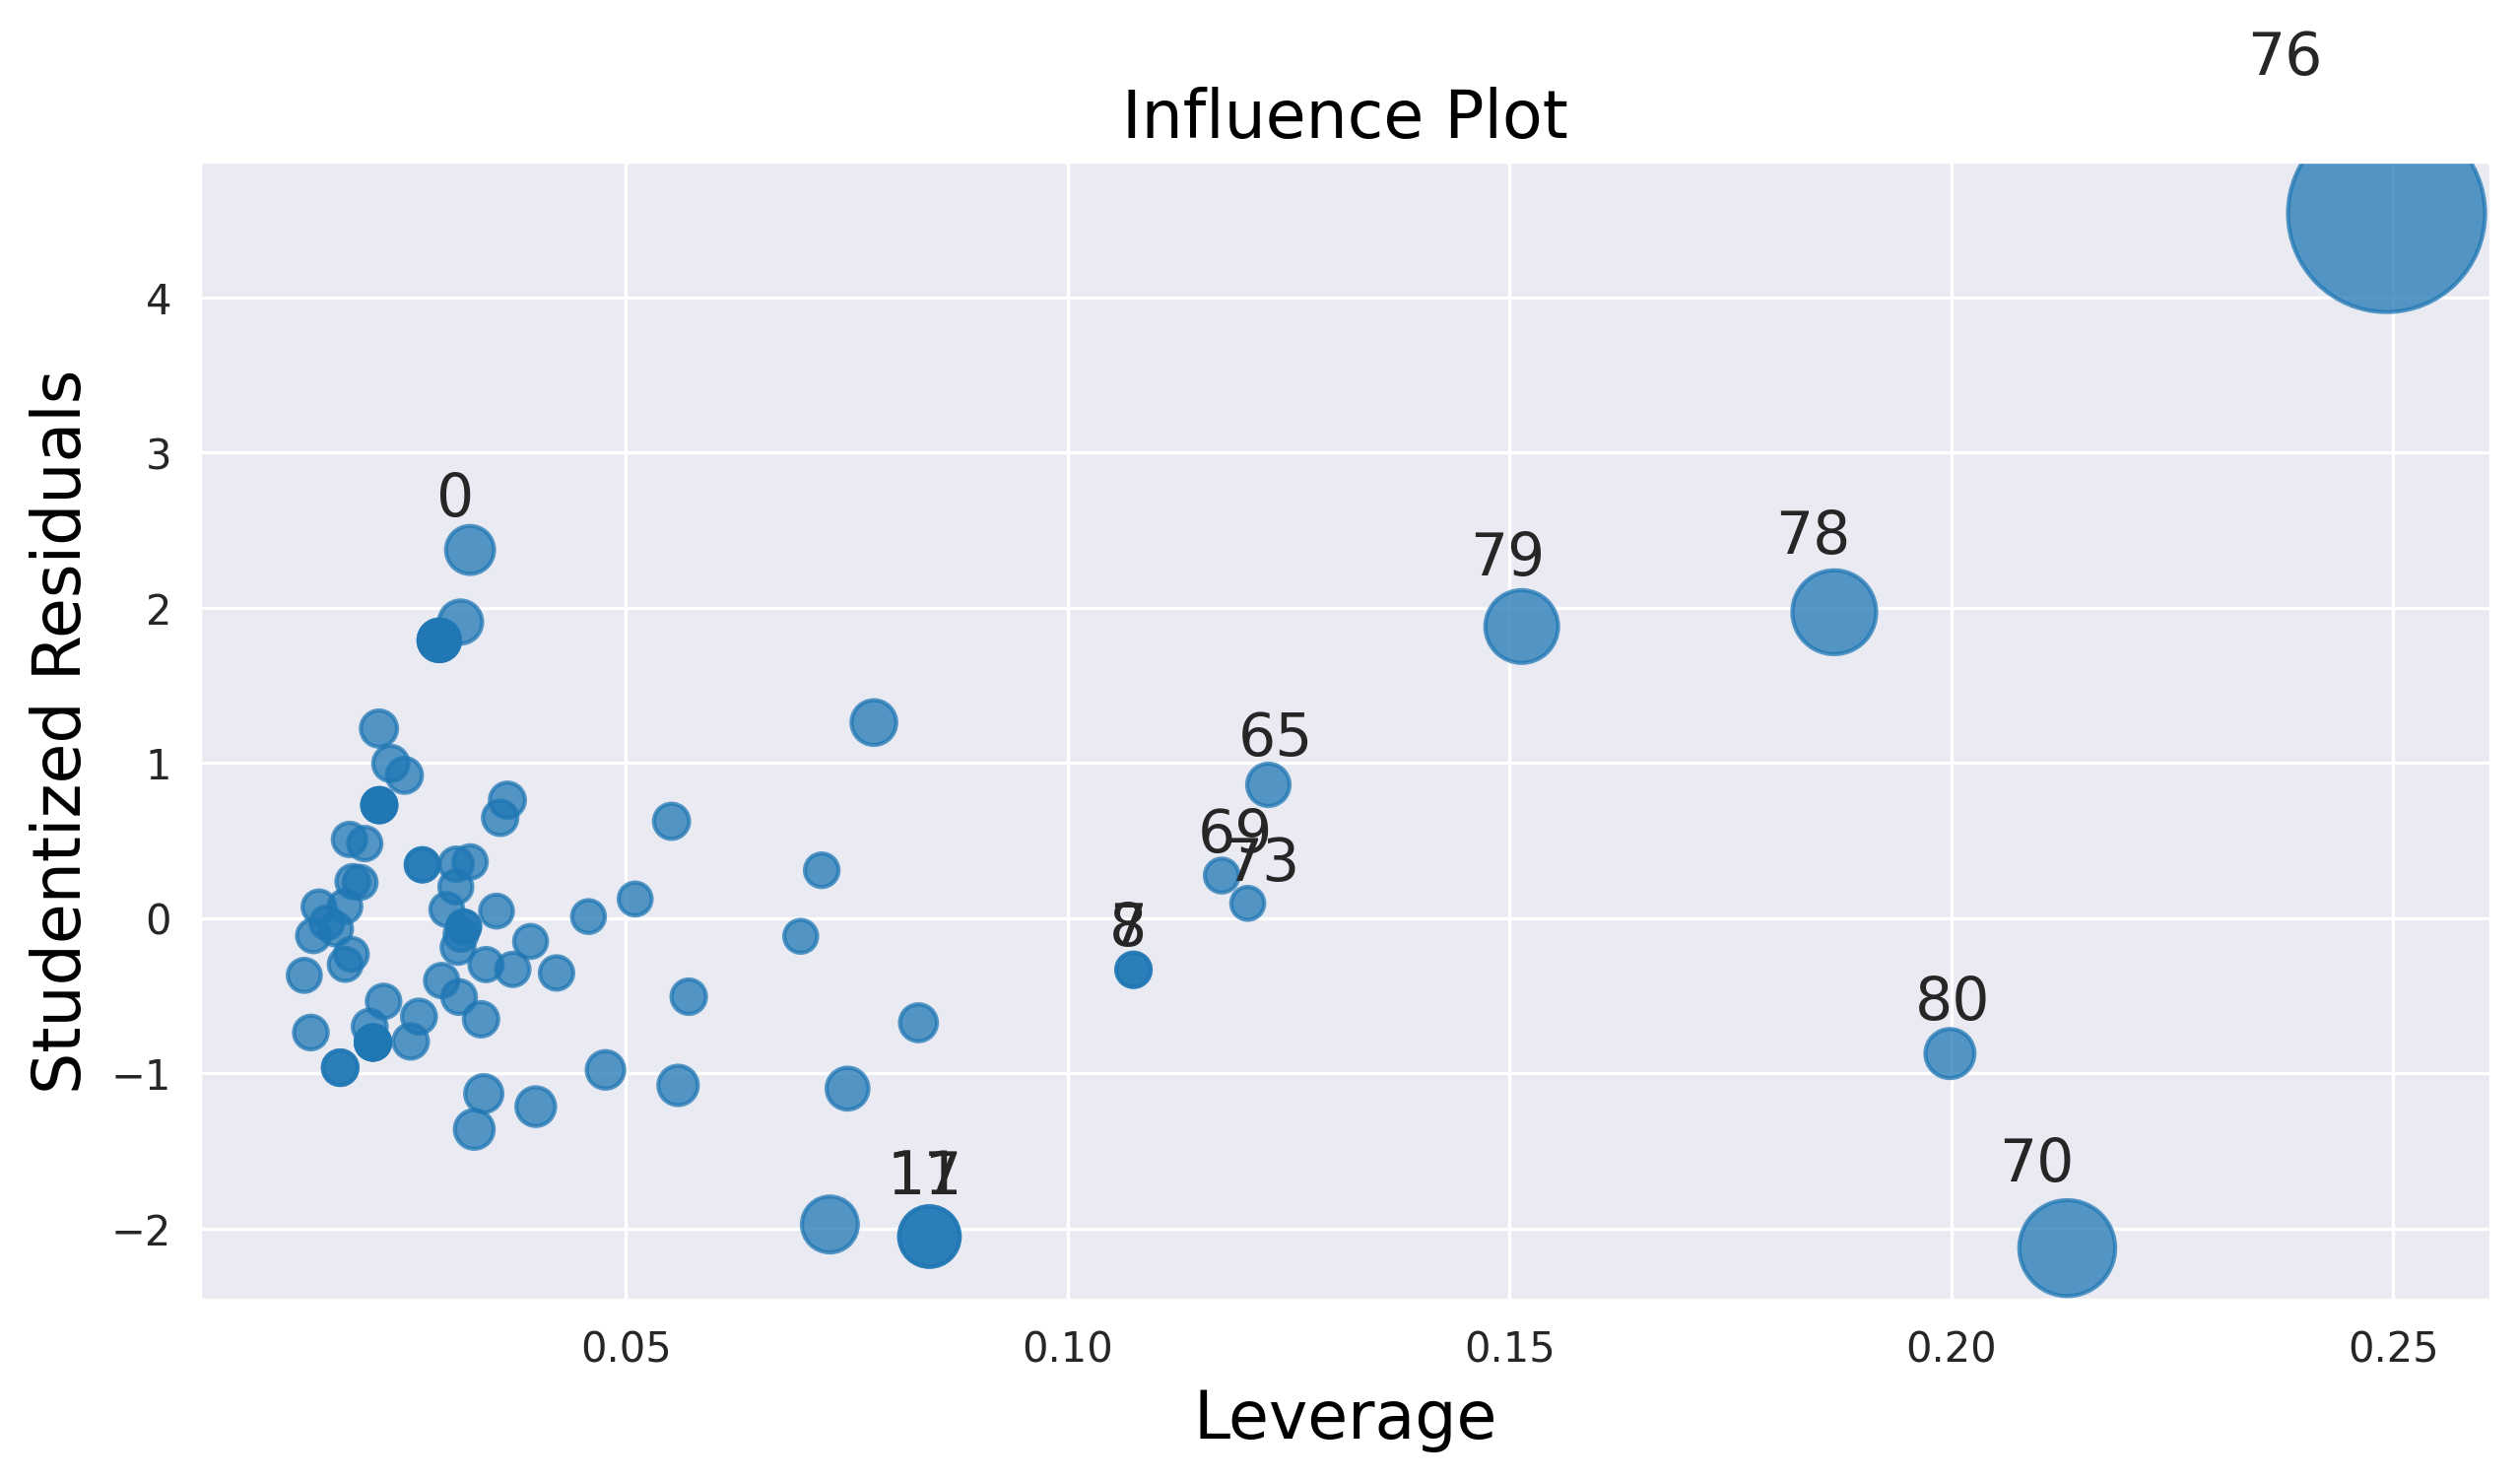

In [54]:
#influence plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)

In [55]:
# calculate cutoff
k=len(df.columns)
n=len(df)

leverage=3*(k+1)/n
leverage

0.2222222222222222

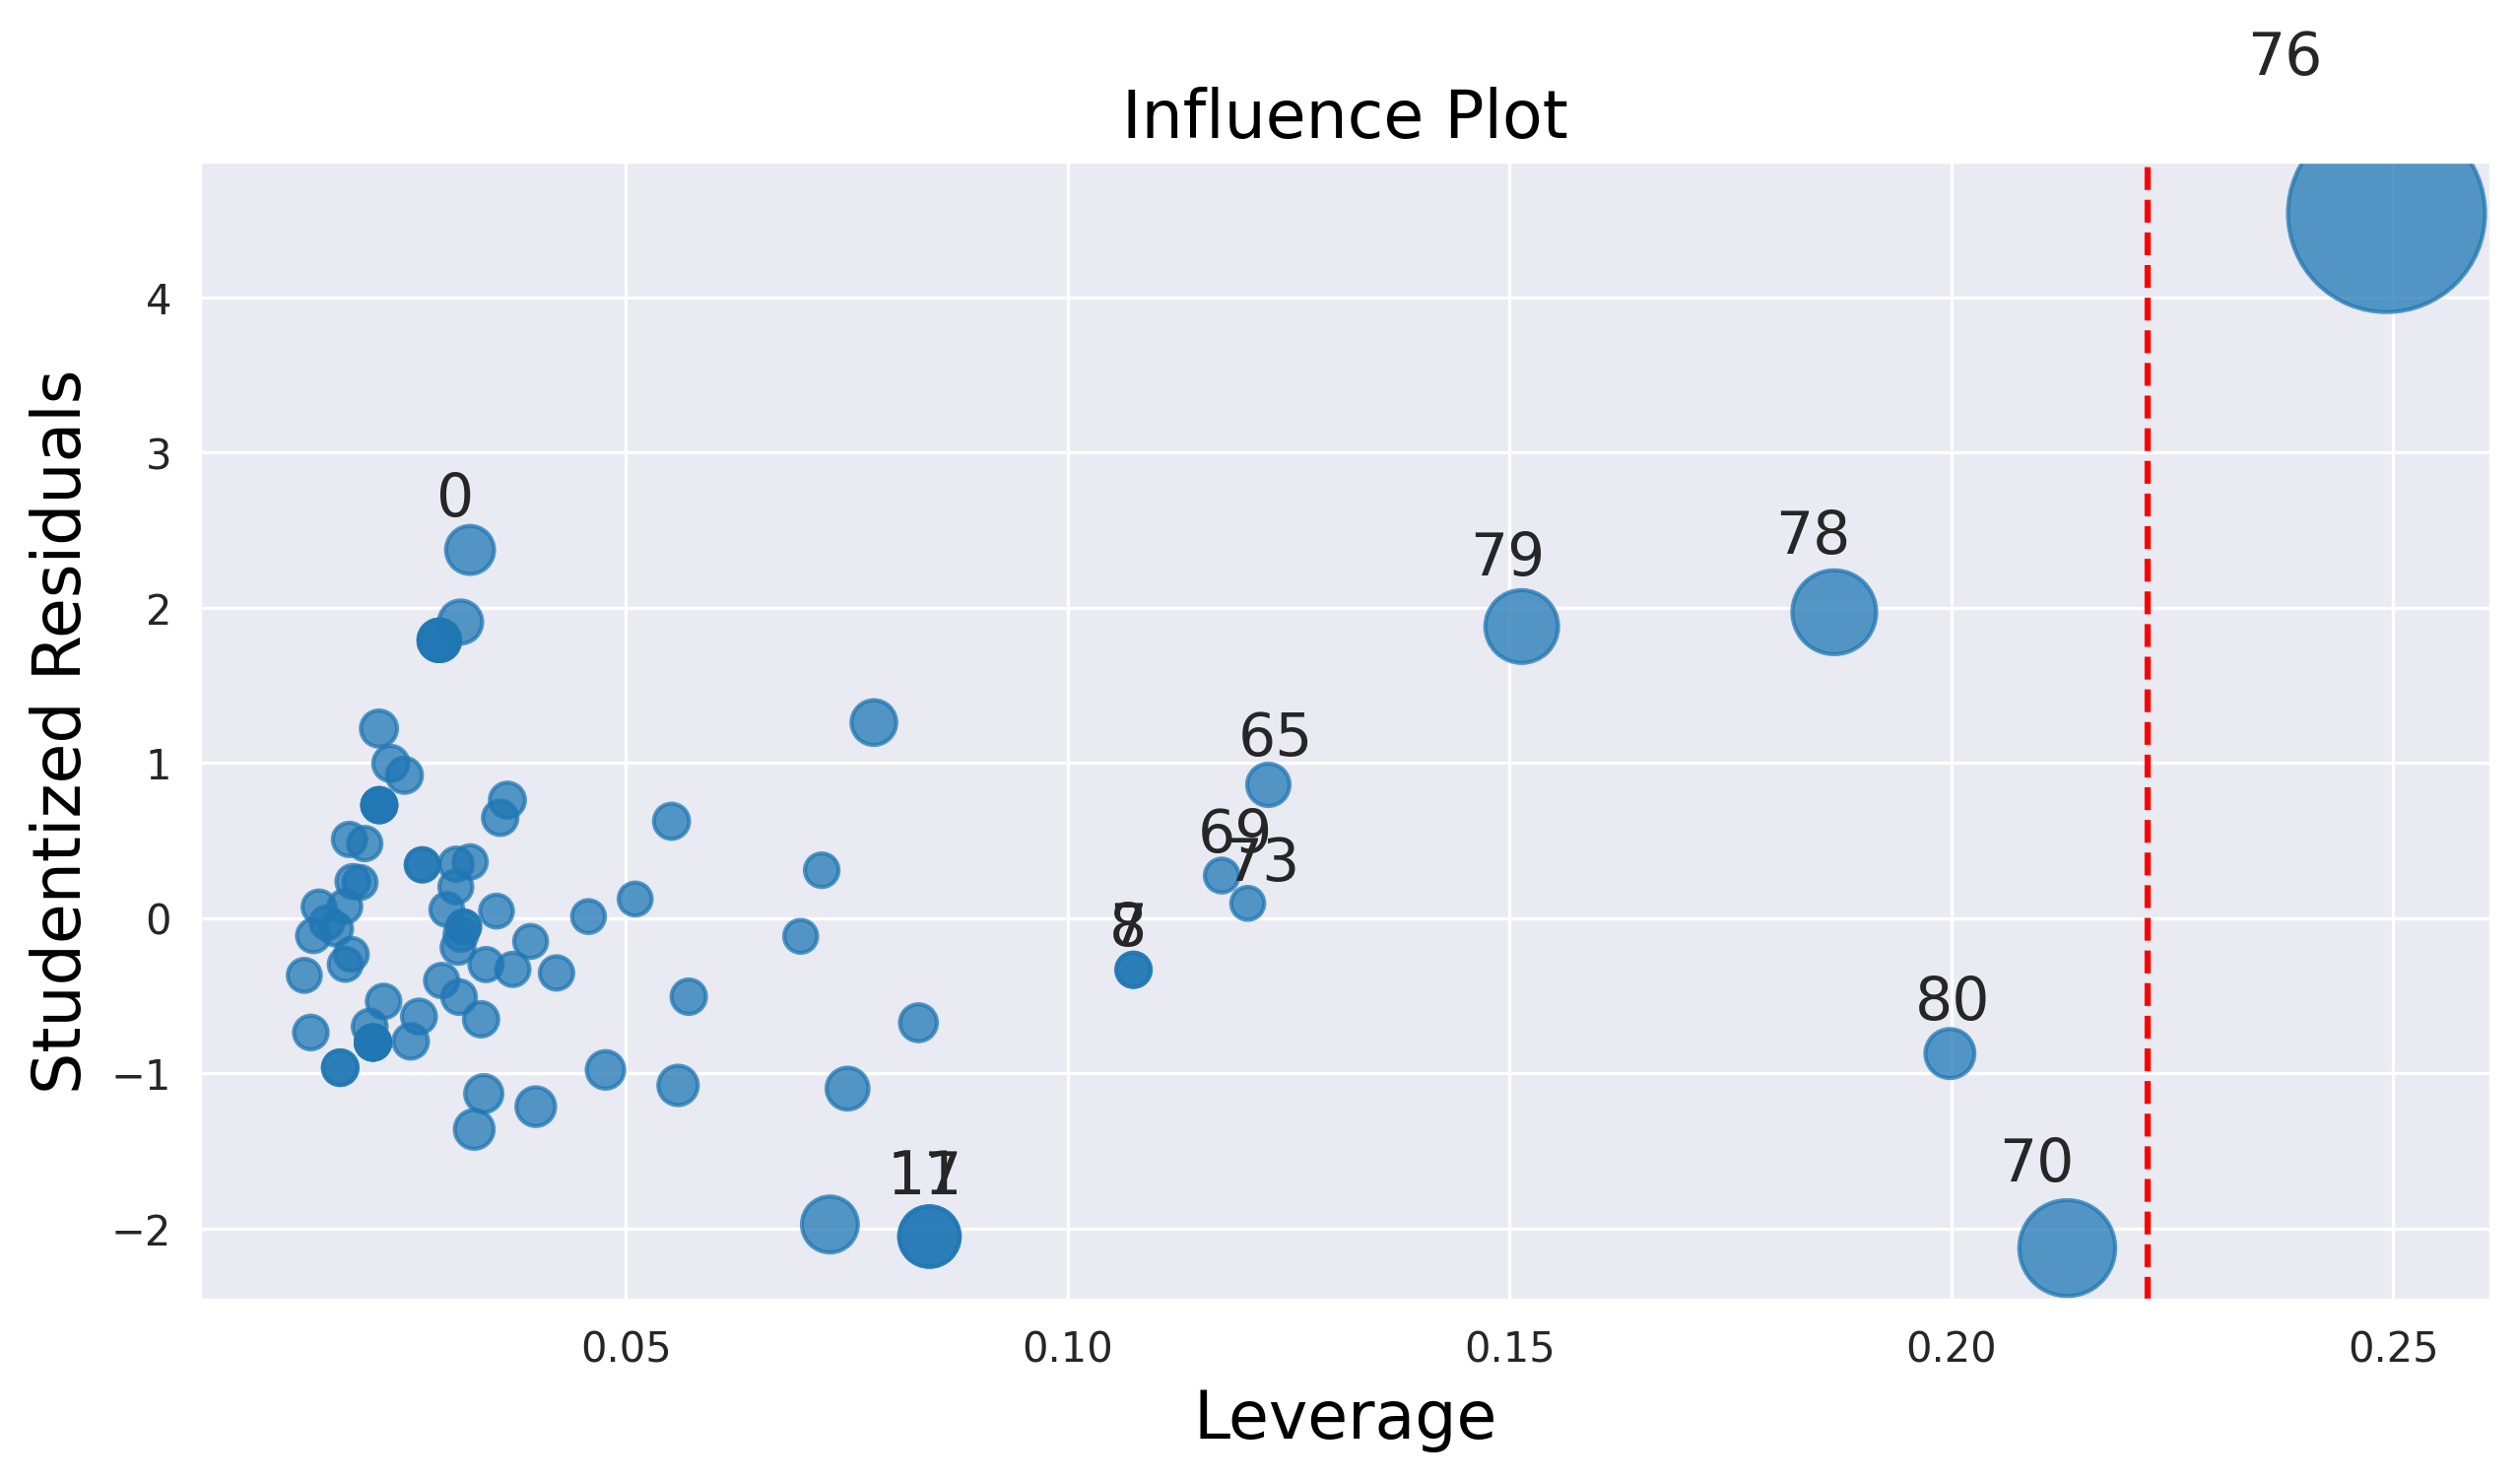

In [56]:
influence_plot(model)
plt.axvline(leverage,linestyle="--",color="red")
#axvline: axis vertical line to draw a vertical line

# **improving the model**

In [61]:
df.drop(index=76,inplace=True)


KeyError: '[76] not found in axis'

In [62]:
df


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [67]:
df.reset_index(inplace=True)
# reset the index


ValueError: cannot insert level_0, already exists

In [68]:
df

,level_0,index,HP,MPG,VOL,SP,WT
0,0,0,49,53.700681,89,104.185353,28.762059
1,1,1,55,50.013401,92,105.461264,30.466833
2,2,2,55,50.013401,92,105.461264,30.193597
3,3,3,70,45.696322,92,113.461264,30.632114
4,4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...,...
75,75,75,175,18.762837,129,132.864163,42.778219
76,76,77,238,19.197888,115,150.576579,37.923113
77,77,78,263,34.000000,50,151.598513,15.769625
78,78,79,295,19.833733,119,167.944460,39.423099


In [69]:
df.drop(columns=["index"],inplace=True)
#drop index column which is not imp

In [70]:
df

,level_0,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,76,238,19.197888,115,150.576579,37.923113
77,77,263,34.000000,50,151.598513,15.769625
78,78,295,19.833733,119,167.944460,39.423099


In [71]:
final_model=smf.ols("MPG~HP+VOL+SP",data=df).fit()

In [72]:
final_model.rsquared # model accuracy is increased from 75% to 82%


0.8192122305013384

as the cook's distence values are <1 we can stop the diagnostic process and finalize the model

# **Predicting New Records**

In [73]:
df.head()

,level_0,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149


In [75]:
test=pd.DataFrame({
    "HP":[56,53.62,95],
    "VOL":[92.6,85.63,75],
    "SP":[110,112,150]
})

In [76]:
final_model.params

,0
Intercept,27.755465
HP,-0.226762
VOL,-0.172856
SP,0.412363


In [77]:
test

,HP,VOL,SP
0,56.00,92.60,110
1,53.62,85.63,112
2,95.00,75.00,150


In [78]:
final_model.predict(test)

,0
0,44.410251
1,46.979473
2,55.103295
